# Micro-Credit Defaulter Model Project:

**STATEMENT: A Microfinance Institution (MFI) is an organization that offers financial services to low income populations. MFS becomes very useful when targeting especially the  poor families living in remote areas with not much sources of income. The Microfinance services (MFS) provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans and so on.**

**Many microfinance institutions (MFI), experts and donors are supporting the idea of using mobile financial services (MFS) which they feel are more convenient and efficient, and cost saving, than the traditional high-touch model used since long for the purpose of delivering microfinance services. Though, the MFI industry is primarily focusing on low income families and are very useful in such areas, the implementation of MFS has been uneven with both significant challenges and successes.**

**Today, microfinance is widely accepted as a poverty-reduction tool, representing $70 billion in outstanding loans and a global outreach of 200 million clients**.

**We are working with one such client that is in Telecom Industry. They are a fixed wireless telecommunications network provider. They have launched various products and have developed its business and organization based on the budget operator model, offering better products at Lower Prices to all value conscious customers through a strategy of disruptive innovation that focuses on the subscriber.**

**They understand the importance of communication and how it affects a person’s life, thus, focusing on providing their services and products to low income families and poor customers that can help them in the need of hour.**

**They are collaborating with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days. For the loan amount of 5 (in Indonesian Rupiah), payback amount should be 6 (in Indonesian Rupiah), while, for the loan amount of 10 (in Indonesian Rupiah), the payback amount should be 12 (in Indonesian Rupiah).**

**The sample data is provided to us from our client database. It is hereby given to you for this exercise. In order to improve the selection of customers for the credit, the client wants some predictions that could help them in further investment and improvement in selection of customers.** 

**NOTE: Build a model which can be used to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan. In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter.**


# Importing dataset:

In [1]:
# Importing necessary packages

# Importing fundamental packages
import warnings
warnings.filterwarnings("ignore")

import pyforest            


## For visualization
import matplotlib.pyplot as plt                                         
%matplotlib inline

import seaborn as sns

from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
from sklearn.metrics import plot_roc_curve 

## Data Pre-Processing Packages
from scipy.stats import chi2_contingency
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from scipy.stats import zscore
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from collections import Counter
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE
from sklearn.preprocessing import scale

## To create copy of data
import copy

## Pipeline Packages

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline


## Ensemble Learning Algorithms Packages

from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform
from sklearn.linear_model import Ridge
from sklearn.svm import SVC
from xgboost import XGBClassifier

## Evaluation Metrics Packages
import statsmodels.api as sm
from scipy.stats import f
from statsmodels.formula.api import ols
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.utils import resample
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import preprocessing
from sklearn.metrics import average_precision_score, confusion_matrix, accuracy_score, classification_report, plot_confusion_matrix
from sklearn.metrics import roc_curve, auc

# Bagging and Boosting
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier                           

# Saving the model
import pickle

In [2]:
#importing dataset
df=pd.read_csv("Data file.csv") #Reading csv file
df.head()

<IPython.core.display.Javascript object>

Unnamed: 0  label       msisdn    aon  daily_decr30  daily_decr90  \
0           1      0  21408I70789  272.0   3055.050000   3065.150000   
1           2      1  76462I70374  712.0  12122.000000  12124.750000   
2           3      1  17943I70372  535.0   1398.000000   1398.000000   
3           4      1  55773I70781  241.0     21.228000     21.228000   
4           5      1  03813I82730  947.0    150.619333    150.619333   

   rental30  rental90  last_rech_date_ma  last_rech_date_da  ...  \
0    220.13    260.13                2.0                0.0  ...   
1   3691.26   3691.26               20.0                0.0  ...   
2    900.13    900.13                3.0                0.0  ...   
3    159.42    159.42               41.0                0.0  ...   
4   1098.90   1098.90                4.0                0.0  ...   

   maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0              6.0                 0.0          2.0            12   
1             12.0                 0.0          1.0            12   
2              6.0                 0.0          1.0             6   
3              6.0                 0.0          2.0            12   
4              6.0                 0.0          7.0            42   

   maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
0                6                 0.0  29.000000  29.000000      UPW   
1               12                 0.0   0.000000   0.000000      UPW   
2                6                 0.0   0.000000   0.000000      UPW   
3                6                 0.0   0.000000   0.000000      UPW   
4                6                 0.0   2.333333   2.333333      UPW   

        pdate  
0  2016-07-20  
1  2016-08-10  
2  2016-08-19  
3  2016-06-06  
4  2016-06-22  

[5 rows x 37 columns]

## Problem Statement:

Above is my dataset and label is my target column I have to predict the probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan. In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter.So clearly it's a **Classification problem**.

# Features information:

- label : Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}
- msisdn : mobile number of user
- aon : age on cellular network in days
- daily_decr30 : Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)
- daily_decr90 : Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)
- rental30 : Average main account balance over last 30 days
- rental90 : Average main account balance over last 90 days
- last_rech_date_ma : Number of days till last recharge of main account
- last_rech_date_da: Number of days till last recharge of data account
- last_rech_amt_ma : Amount of last recharge of main account (in Indonesian Rupiah)
- cnt_ma_rech30 : Number of times main account got recharged in last 30 days
- fr_ma_rech30 : Frequency of main account recharged in last 30 days
- sumamnt_ma_rech30 : Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)
- medianamnt_ma_rech30 : Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)
- medianmarechprebal30 : Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)
- cnt_ma_rech90 : Number of times main account got recharged in last 90 days
- fr_ma_rech90 : Frequency of main account recharged in last 90 days
- sumamnt_ma_rech90 : Total amount of recharge in main account over last 90 days (in Indonasian Rupiah)
- medianamnt_ma_rech90 : Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah)
- medianmarechprebal90 : Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)
- cnt_da_rech30 : Number of times data account got recharged in last 30 days
- fr_da_rech30: Frequency of data account recharged in last 30 days
- cnt_da_rech90 : Number of times data account got recharged in last 90 days
- fr_da_rech90 : Frequency of data account recharged in last 90 days
- cnt_loans30 : Number of loans taken by user in last 30 days
- amnt_loans30: Total amount of loans taken by user in last 30 days
- maxamnt_loans30 : maximum amount of loan taken by the user in last 30 days
- medianamnt_loans30 : Median of amounts of loan taken by the user in last 30 days
- cnt_loans90 : Number of loans taken by user in last 90 days
- amnt_loans90 : Total amount of loans taken by user in last 90 days
- maxamnt_loans90 : maximum amount of loan taken by the user in last 90 days
- medianamnt_loans90 : Median of amounts of loan taken by the user in last 90 days
- payback30 : Average payback time in days over last 30 days
- payback90 : Average payback time in days over last 90 days
- pcircle : telecom circle
- pdate : date

# Preprocessing and EDA:

In [3]:
#Checking shape of dataset
df.shape

(209593, 37)

In this perticular dataset we have 209593 rows and 37 columns.

In [4]:
#Checking all column names
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

Above are the list of column names in the dataset.

In [5]:
#Checking the data types of all columns
df.dtypes

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

I have all 3 types of data in dataset they are integer, float and object.pdate should be a datetime datatype so we have to change it from object to datetime datatype.

In [6]:
#Checking the info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

There is no null values in the dataset and we can also see the datatypes of each column.

In [7]:
#Checking unique values of each column
df.nunique()

Unnamed: 0              209593
label                        2
msisdn                  186243
aon                       4507
daily_decr30            147025
daily_decr90            158669
rental30                132148
rental90                141033
last_rech_date_ma         1186
last_rech_date_da         1174
last_rech_amt_ma            70
cnt_ma_rech30               71
fr_ma_rech30              1083
sumamnt_ma_rech30        15141
medianamnt_ma_rech30       510
medianmarechprebal30     30428
cnt_ma_rech90              110
fr_ma_rech90                89
sumamnt_ma_rech90        31771
medianamnt_ma_rech90       608
medianmarechprebal90     29785
cnt_da_rech30             1066
fr_da_rech30              1072
cnt_da_rech90               27
fr_da_rech90                46
cnt_loans30                 40
amnt_loans30                48
maxamnt_loans30           1050
medianamnt_loans30           6
cnt_loans90               1110
amnt_loans90                69
maxamnt_loans90              3
medianam

'Unnamed:0' is a index column in raw dataset so we can drop it here itself. And pcircle has only one entry throughout so it will have no contribution with our model training we can drop this column also. Also msisdn is a column with phone numbers of users so this column has no contribution on model building.

In [8]:
#Droping Unnamed: 0, msisdn and pcircle column
df = df.drop(["Unnamed: 0"],axis=1)
df = df.drop(["pcircle"],axis=1)
df = df.drop(["msisdn"],axis=1)

In [9]:
#Checking null values in the dataset
df.isnull().sum()

label                   0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pdate                   0
dtype: int64

There is no null values in our dataset.

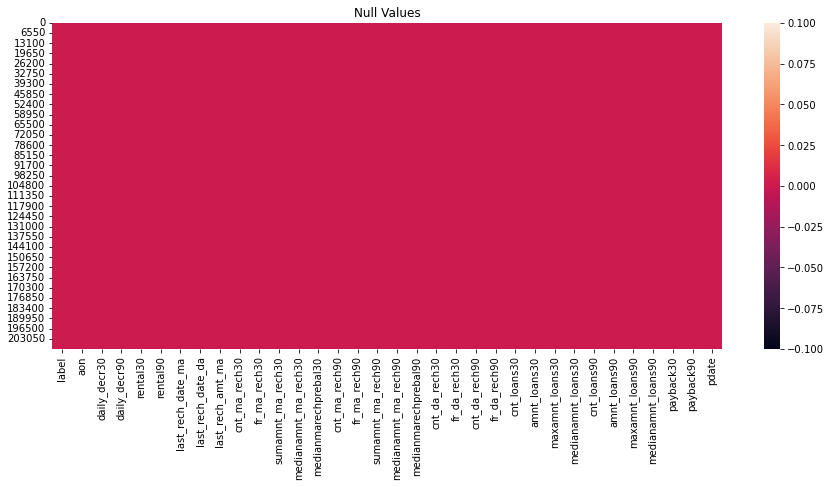

In [10]:
#Visualizeing null values
plt.figure(figsize=[15,6])
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

By visualization we can clearly say that there is no null values in the dataset.

In [11]:
#Checking unique values of target column
df['label'].unique()

array([0, 1], dtype=int64)

There is only two unique values in target column so its a binary classification problem.

In [12]:
#Checking for empty observations
df.loc[df['label'] == " "]

Empty DataFrame
Columns: [label, aon, daily_decr30, daily_decr90, rental30, rental90, last_rech_date_ma, last_rech_date_da, last_rech_amt_ma, cnt_ma_rech30, fr_ma_rech30, sumamnt_ma_rech30, medianamnt_ma_rech30, medianmarechprebal30, cnt_ma_rech90, fr_ma_rech90, sumamnt_ma_rech90, medianamnt_ma_rech90, medianmarechprebal90, cnt_da_rech30, fr_da_rech30, cnt_da_rech90, fr_da_rech90, cnt_loans30, amnt_loans30, maxamnt_loans30, medianamnt_loans30, cnt_loans90, amnt_loans90, maxamnt_loans90, medianamnt_loans90, payback30, payback90, pdate]
Index: []

[0 rows x 34 columns]

There is no empty observations in my target column.

# Feature Extraction:

In [13]:
#Converting object data type to datetime 
df['pdate'] =  pd.to_datetime(df['pdate'])

<IPython.core.display.Javascript object>

In [14]:
#Extracting paid year,month and day from pdate

#Extracting year
df["pyear"]=pd.to_datetime(df.pdate, format="%d/%m/%Y").dt.year

#Extracting month
df["pmonth"]=pd.to_datetime(df.pdate, format="%d/%m/%Y").dt.month

#Extracting day
df["pday"]=pd.to_datetime(df.pdate, format="%d/%m/%Y").dt.day

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:
#Droping pdate column after extraction
df = df.drop(["pdate"],axis=1)

I have successfully extracted day, month and year column from pdate column.

In [16]:
#Checking the value counts of pyear column
df.pyear.value_counts()

2016    209593
Name: pyear, dtype: int64

So in pyear column all the entries are of year 2016 keeping all entries same will not help our training so let's drop it.

In [17]:
#Droping pyear column
df = df.drop(["pyear"],axis=1)

In [18]:
df.columns

Index(['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90',
       'pmonth', 'pday'],
      dtype='object')

In [19]:
#Checking the value counts of last_rech_date_da column
df.last_rech_date_da.value_counts()

0.000000         202861
7.000000            163
8.000000            160
11.000000           149
13.000000           148
                  ...  
731116.874493         1
609105.662326         1
945424.253703         1
505559.452693         1
636529.127252         1
Name: last_rech_date_da, Length: 1174, dtype: int64

I have 97% zeros in this column.

In [20]:
#Checking the value counts of cnt_da_rech30 column
df.cnt_da_rech30.value_counts()

0.000000        205479
1.000000          2331
2.000000           372
3.000000           156
4.000000            86
                 ...  
13710.643665         1
84844.562846         1
65385.403518         1
93840.663070         1
61002.421345         1
Name: cnt_da_rech30, Length: 1066, dtype: int64

I have 98% zeros in this column.

In [21]:
#Checking the value counts of fr_da_rech30 column
df.fr_da_rech30.value_counts()

0.000000         208014
3.000000             64
1.000000             55
2.000000             51
7.000000             47
                  ...  
757900.530472         1
870976.477512         1
797647.001920         1
519699.885393         1
509386.302670         1
Name: fr_da_rech30, Length: 1072, dtype: int64

I have 99% zeros in this column.

In [22]:
#Checking the value counts of cnt_da_rech90 column
df.cnt_da_rech90.value_counts()

0     204226
1       4173
2        556
3        227
4        150
5         74
6         49
7         36
8         30
9         18
14        10
12         7
11         7
13         6
10         6
16         4
18         3
15         2
20         1
25         1
28         1
30         1
22         1
38         1
19         1
27         1
17         1
Name: cnt_da_rech90, dtype: int64

I have 97% zeros in this column.

In [23]:
#Checking the value counts of fr_da_rech90 column
df.fr_da_rech90.value_counts()

0     208728
3         78
1         66
2         66
4         56
7         55
6         52
5         45
8         44
10        33
14        32
9         32
11        30
12        27
19        22
28        19
15        17
13        17
18        16
29        15
16        14
17        14
25        11
22        11
21        10
20         9
32         8
24         8
27         8
26         7
30         7
31         6
34         5
37         5
23         5
57         3
35         2
41         2
42         1
39         1
33         1
43         1
56         1
46         1
55         1
64         1
Name: fr_da_rech90, dtype: int64

I have 99% zeros in this column.

In [24]:
#Checking the value counts of medianamnt_loans30 column
df.medianamnt_loans30.value_counts()

0.0    195445
1.0      7149
0.5      6538
2.0       420
1.5        38
3.0         3
Name: medianamnt_loans30, dtype: int64

I have 93% zeros in this column.

In [25]:
#Checking the value counts of medianamnt_loans90 column
df.medianamnt_loans90.value_counts()

0.0    197424
1.0      6172
0.5      5668
2.0       307
1.5        19
3.0         3
Name: medianamnt_loans90, dtype: int64

I have 94% zeros in this column.

In all the above columns i found more than 90% zeros so they will create skewness in our dataset. So we have to drop these columns. **{I have also looked into the valuecounts of other columns and they looked perfect, but i have removed there coding and output due to space problem.}**

In [26]:
#Droping columns with more than 90% zeros
df.drop(columns = ['last_rech_date_da','cnt_da_rech30','fr_da_rech30','cnt_da_rech90','fr_da_rech90','medianamnt_loans30','medianamnt_loans90'],inplace = True)

In [27]:
#Checking description of data set
df.describe()

label            aon   daily_decr30   daily_decr90  \
count  209593.000000  209593.000000  209593.000000  209593.000000   
mean        0.875177    8112.343445    5381.402289    6082.515068   
std         0.330519   75696.082531    9220.623400   10918.812767   
min         0.000000     -48.000000     -93.012667     -93.012667   
25%         1.000000     246.000000      42.440000      42.692000   
50%         1.000000     527.000000    1469.175667    1500.000000   
75%         1.000000     982.000000    7244.000000    7802.790000   
max         1.000000  999860.755168  265926.000000  320630.000000   

            rental30       rental90  last_rech_date_ma  last_rech_amt_ma  \
count  209593.000000  209593.000000      209593.000000     209593.000000   
mean     2692.581910    3483.406534        3755.847800       2064.452797   
std      4308.586781    5770.461279       53905.892230       2370.786034   
min    -23737.140000  -24720.580000         -29.000000          0.000000   
25%       280.420000     300.260000           1.000000        770.000000   
50%      1083.570000    1334.000000           3.000000       1539.000000   
75%      3356.940000    4201.790000           7.000000       2309.000000   
max    198926.110000  200148.110000      998650.377733      55000.000000   

       cnt_ma_rech30   fr_ma_rech30  ...    cnt_loans30   amnt_loans30  \
count  209593.000000  209593.000000  ...  209593.000000  209593.000000   
mean        3.978057    3737.355121  ...       2.758981      17.952021   
std         4.256090   53643.625172  ...       2.554502      17.379741   
min         0.000000       0.000000  ...       0.000000       0.000000   
25%         1.000000       0.000000  ...       1.000000       6.000000   
50%         3.000000       2.000000  ...       2.000000      12.000000   
75%         5.000000       6.000000  ...       4.000000      24.000000   
max       203.000000  999606.368132  ...      50.000000     306.000000   

       maxamnt_loans30    cnt_loans90   amnt_loans90  maxamnt_loans90  \
count    209593.000000  209593.000000  209593.000000    209593.000000   
mean        274.658747      18.520919      23.645398         6.703134   
std        4245.264648     224.797423      26.469861         2.103864   
min           0.000000       0.000000       0.000000         0.000000   
25%           6.000000       1.000000       6.000000         6.000000   
50%           6.000000       2.000000      12.000000         6.000000   
75%           6.000000       5.000000      30.000000         6.000000   
max       99864.560864    4997.517944     438.000000        12.000000   

           payback30      payback90         pmonth          pday  
count  209593.000000  209593.000000  209593.000000  209593.00000  
mean        3.398826       4.321485       6.797321      14.39894  
std         8.813729      10.308108       0.741435       8.43890  
min         0.000000       0.000000       6.000000       1.00000  
25%         0.000000       0.000000       6.000000       7.00000  
50%         0.000000       1.666667       7.000000      14.00000  
75%         3.750000       4.500000       7.000000      21.00000  
max       171.500000     171.500000       8.000000      31.00000  

[8 rows x 28 columns]

I can observe negative values in some columns
- aon : age on cellular network in days
- daily_decr30 : Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)
- daily_decr90 : Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)
- rental30 : Average main account balance over last 30 days
- rental90 : Average main account balance over last 90 days
- last_rech_date_ma : Number of days till last recharge of main account 
- medianmarechprebal30 : Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)
- medianmarechprebal90 : Median of main account balance just before recharge in last 90 days at user level (in Indonesian Rupiah)

The above columns can not be negative as they are age, account balance and number of days. So we will change them to positive.

In [28]:
#Converting all negative values to positive values in above columns
df['aon']=abs(df['aon'])
df['daily_decr30']=abs(df['daily_decr30'])
df['daily_decr90']=abs(df['daily_decr90'])
df['rental30']=abs(df['rental30'])
df['rental90']=abs(df['rental90'])
df['last_rech_date_ma']=abs(df['last_rech_date_ma'])
df['medianmarechprebal30']=abs(df['medianmarechprebal30'])
df['medianmarechprebal90']=abs(df['medianmarechprebal90'])

I have successfully converted all negative values to positive values.

In [29]:
#checking if there are other entries in maxamnt_loans30 column except 0,6,12 
df.loc[(df['maxamnt_loans30'] != 6.0) & (df['maxamnt_loans30'] != 12.0) & (df['maxamnt_loans30']!=0.0), 'maxamnt_loans30']

118       61907.697372
125       22099.413732
146       98745.934048
369       58925.364061
374       78232.464324
              ...     
209189    50824.996349
209262    17324.994582
209331    92864.501728
209392    54259.265687
209424    96927.243252
Name: maxamnt_loans30, Length: 1047, dtype: float64

Converting all the above values to zero as it is specified in the problem statement we can have only 0,6,12 as maximum amount of loan taken by the user in last 30 days.

In [30]:
def convert1(val):
    if val <= 6:
        return 6        # For maximum loan amount 6
    else:
        return 12        # For maximum loan amount 12

In [31]:
# Encoding max loan amount for 30 days
df['maxamnt_loans30'] = df['maxamnt_loans30'].apply(convert1)

In [32]:
#Now let's check the valuecount of maxamnt_loans30 column agian
df.maxamnt_loans30.value_counts()

6     182437
12     27156
Name: maxamnt_loans30, dtype: int64

Now it is perfect to proceed.

In [33]:
#Checking description of data set
df.describe()

label            aon   daily_decr30   daily_decr90  \
count  209593.000000  209593.000000  209593.000000  209593.000000   
mean        0.875177    8112.808718    5381.431293    6082.544140   
std         0.330519   75696.032666    9220.606472   10918.796572   
min         0.000000       1.000000       0.000000       0.000000   
25%         1.000000     246.000000      42.453000      42.693333   
50%         1.000000     527.000000    1469.175667    1500.000000   
75%         1.000000     982.000000    7244.000000    7802.790000   
max         1.000000  999860.755168  265926.000000  320630.000000   

            rental30       rental90  last_rech_date_ma  last_rech_amt_ma  \
count  209593.000000  209593.000000      209593.000000     209593.000000   
mean     2715.376558    3509.497148        3756.125844       2064.452797   
std      4294.257439    5754.630600       53905.872857       2370.786034   
min         0.000000       0.000000           0.000000          0.000000   
25%       299.700000     330.000000           1.000000        770.000000   
50%      1095.750000    1347.220000           3.000000       1539.000000   
75%      3362.350000    4204.510000           7.000000       2309.000000   
max    198926.110000  200148.110000      998650.377733      55000.000000   

       cnt_ma_rech30   fr_ma_rech30  ...    cnt_loans30   amnt_loans30  \
count  209593.000000  209593.000000  ...  209593.000000  209593.000000   
mean        3.978057    3737.355121  ...       2.758981      17.952021   
std         4.256090   53643.625172  ...       2.554502      17.379741   
min         0.000000       0.000000  ...       0.000000       0.000000   
25%         1.000000       0.000000  ...       1.000000       6.000000   
50%         3.000000       2.000000  ...       2.000000      12.000000   
75%         5.000000       6.000000  ...       4.000000      24.000000   
max       203.000000  999606.368132  ...      50.000000     306.000000   

       maxamnt_loans30    cnt_loans90   amnt_loans90  maxamnt_loans90  \
count    209593.000000  209593.000000  209593.000000    209593.000000   
mean          6.777392      18.520919      23.645398         6.703134   
std           2.014953     224.797423      26.469861         2.103864   
min           6.000000       0.000000       0.000000         0.000000   
25%           6.000000       1.000000       6.000000         6.000000   
50%           6.000000       2.000000      12.000000         6.000000   
75%           6.000000       5.000000      30.000000         6.000000   
max          12.000000    4997.517944     438.000000        12.000000   

           payback30      payback90         pmonth          pday  
count  209593.000000  209593.000000  209593.000000  209593.00000  
mean        3.398826       4.321485       6.797321      14.39894  
std         8.813729      10.308108       0.741435       8.43890  
min         0.000000       0.000000       6.000000       1.00000  
25%         0.000000       0.000000       6.000000       7.00000  
50%         0.000000       1.666667       7.000000      14.00000  
75%         3.750000       4.500000       7.000000      21.00000  
max       171.500000     171.500000       8.000000      31.00000  

[8 rows x 28 columns]

Now the statistics of dataset looks good. And these data looks clean now.

# Vizualizations:

# Univariate Analysis:

In [34]:
# checking for categorical columns
categorical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_columns.append(i)
print(categorical_columns)

[]


There is no categorical data in the given dataset.

In [35]:
# Now checking for numerical columns
numerical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)
print(numerical_columns)

['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_loans30', 'amnt_loans30', 'maxamnt_loans30', 'cnt_loans90', 'amnt_loans90', 'maxamnt_loans90', 'payback30', 'payback90', 'pmonth', 'pday']


Above are the list of numerical columns in the dataset.

In [36]:
col=[ 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_loans30', 'amnt_loans30', 'maxamnt_loans30', 'cnt_loans90', 'amnt_loans90', 'maxamnt_loans90', 'payback30', 'payback90', 'pmonth', 'pday']

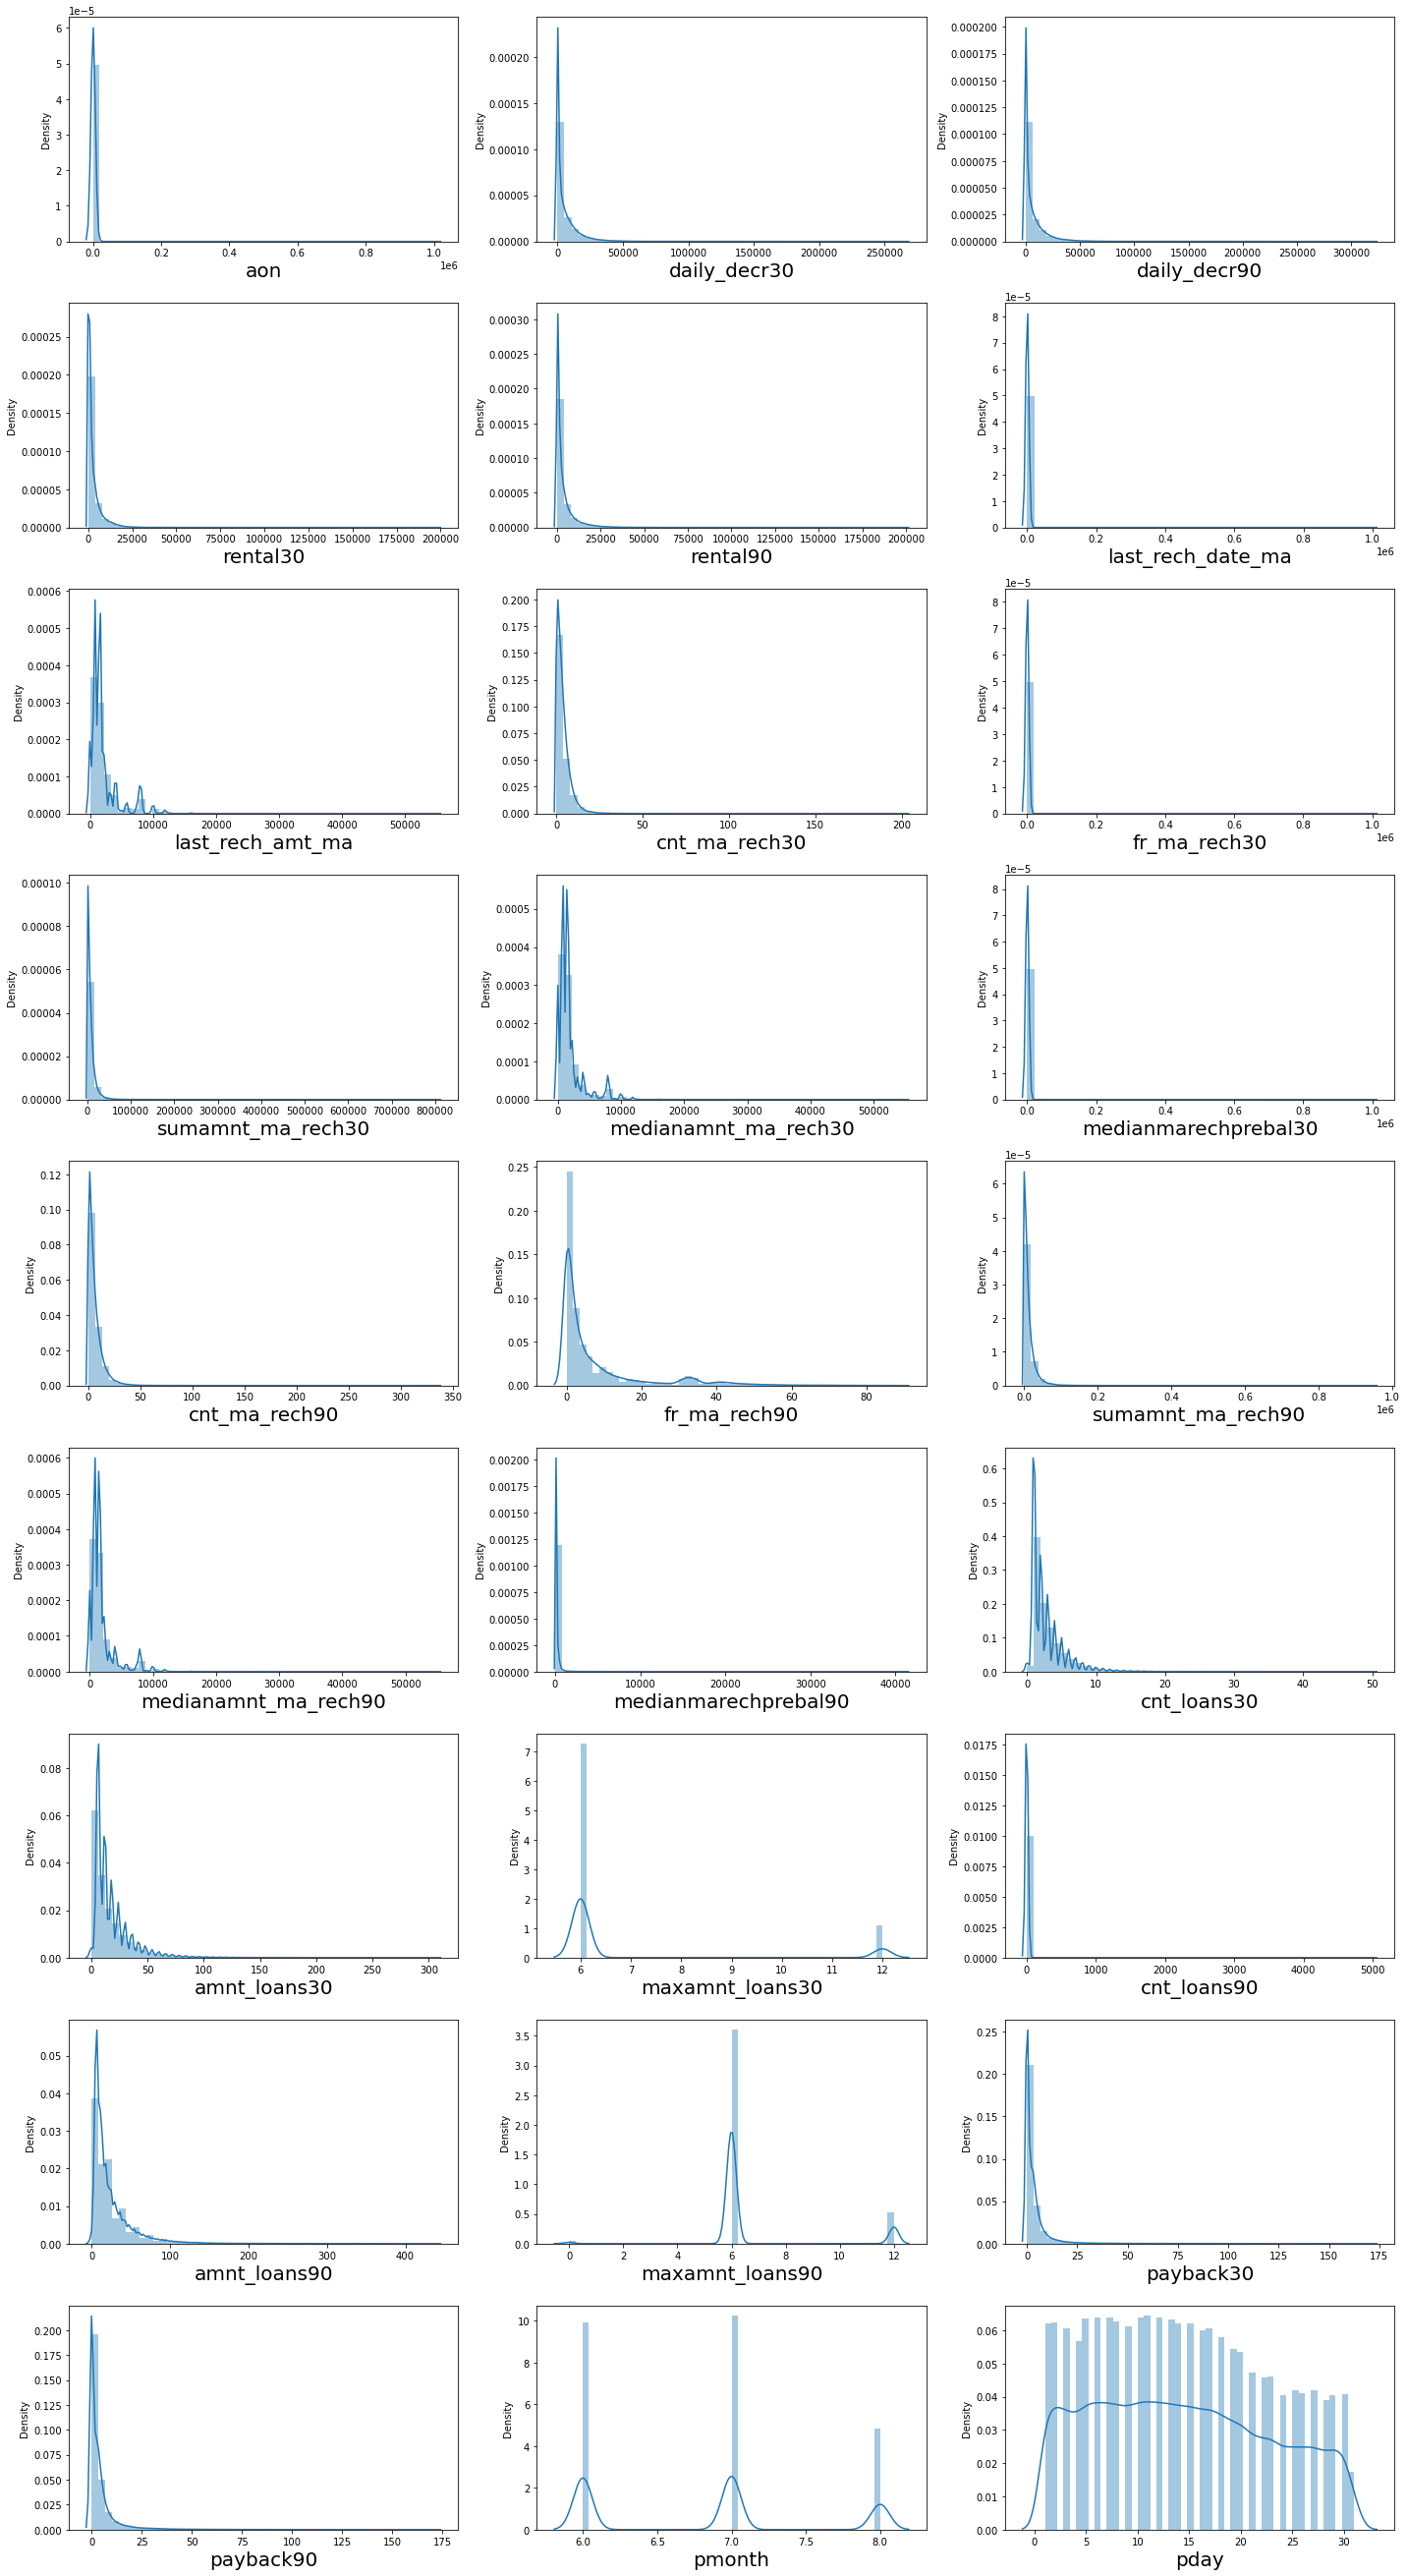

In [37]:
#Distribution plot for all numerical columns except label
plt.figure(figsize = (20,40))
plotnumber = 1
for column in df[col]:
    if plotnumber <=30:
        ax = plt.subplot(10,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber+=1
plt.tight_layout()

**OBSERVATIONS:**
- I can clearly see that there is skewness in most of the columns so we have to treat them.

<AxesSubplot:xlabel='label', ylabel='count'>

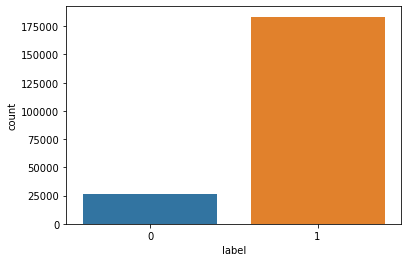

In [38]:
#count plot for target column
sns.countplot(df['label'])

There is a data imbalancing issue so we have to treat this by using oversampling or undersampling. 

# Bivariate Analysis:

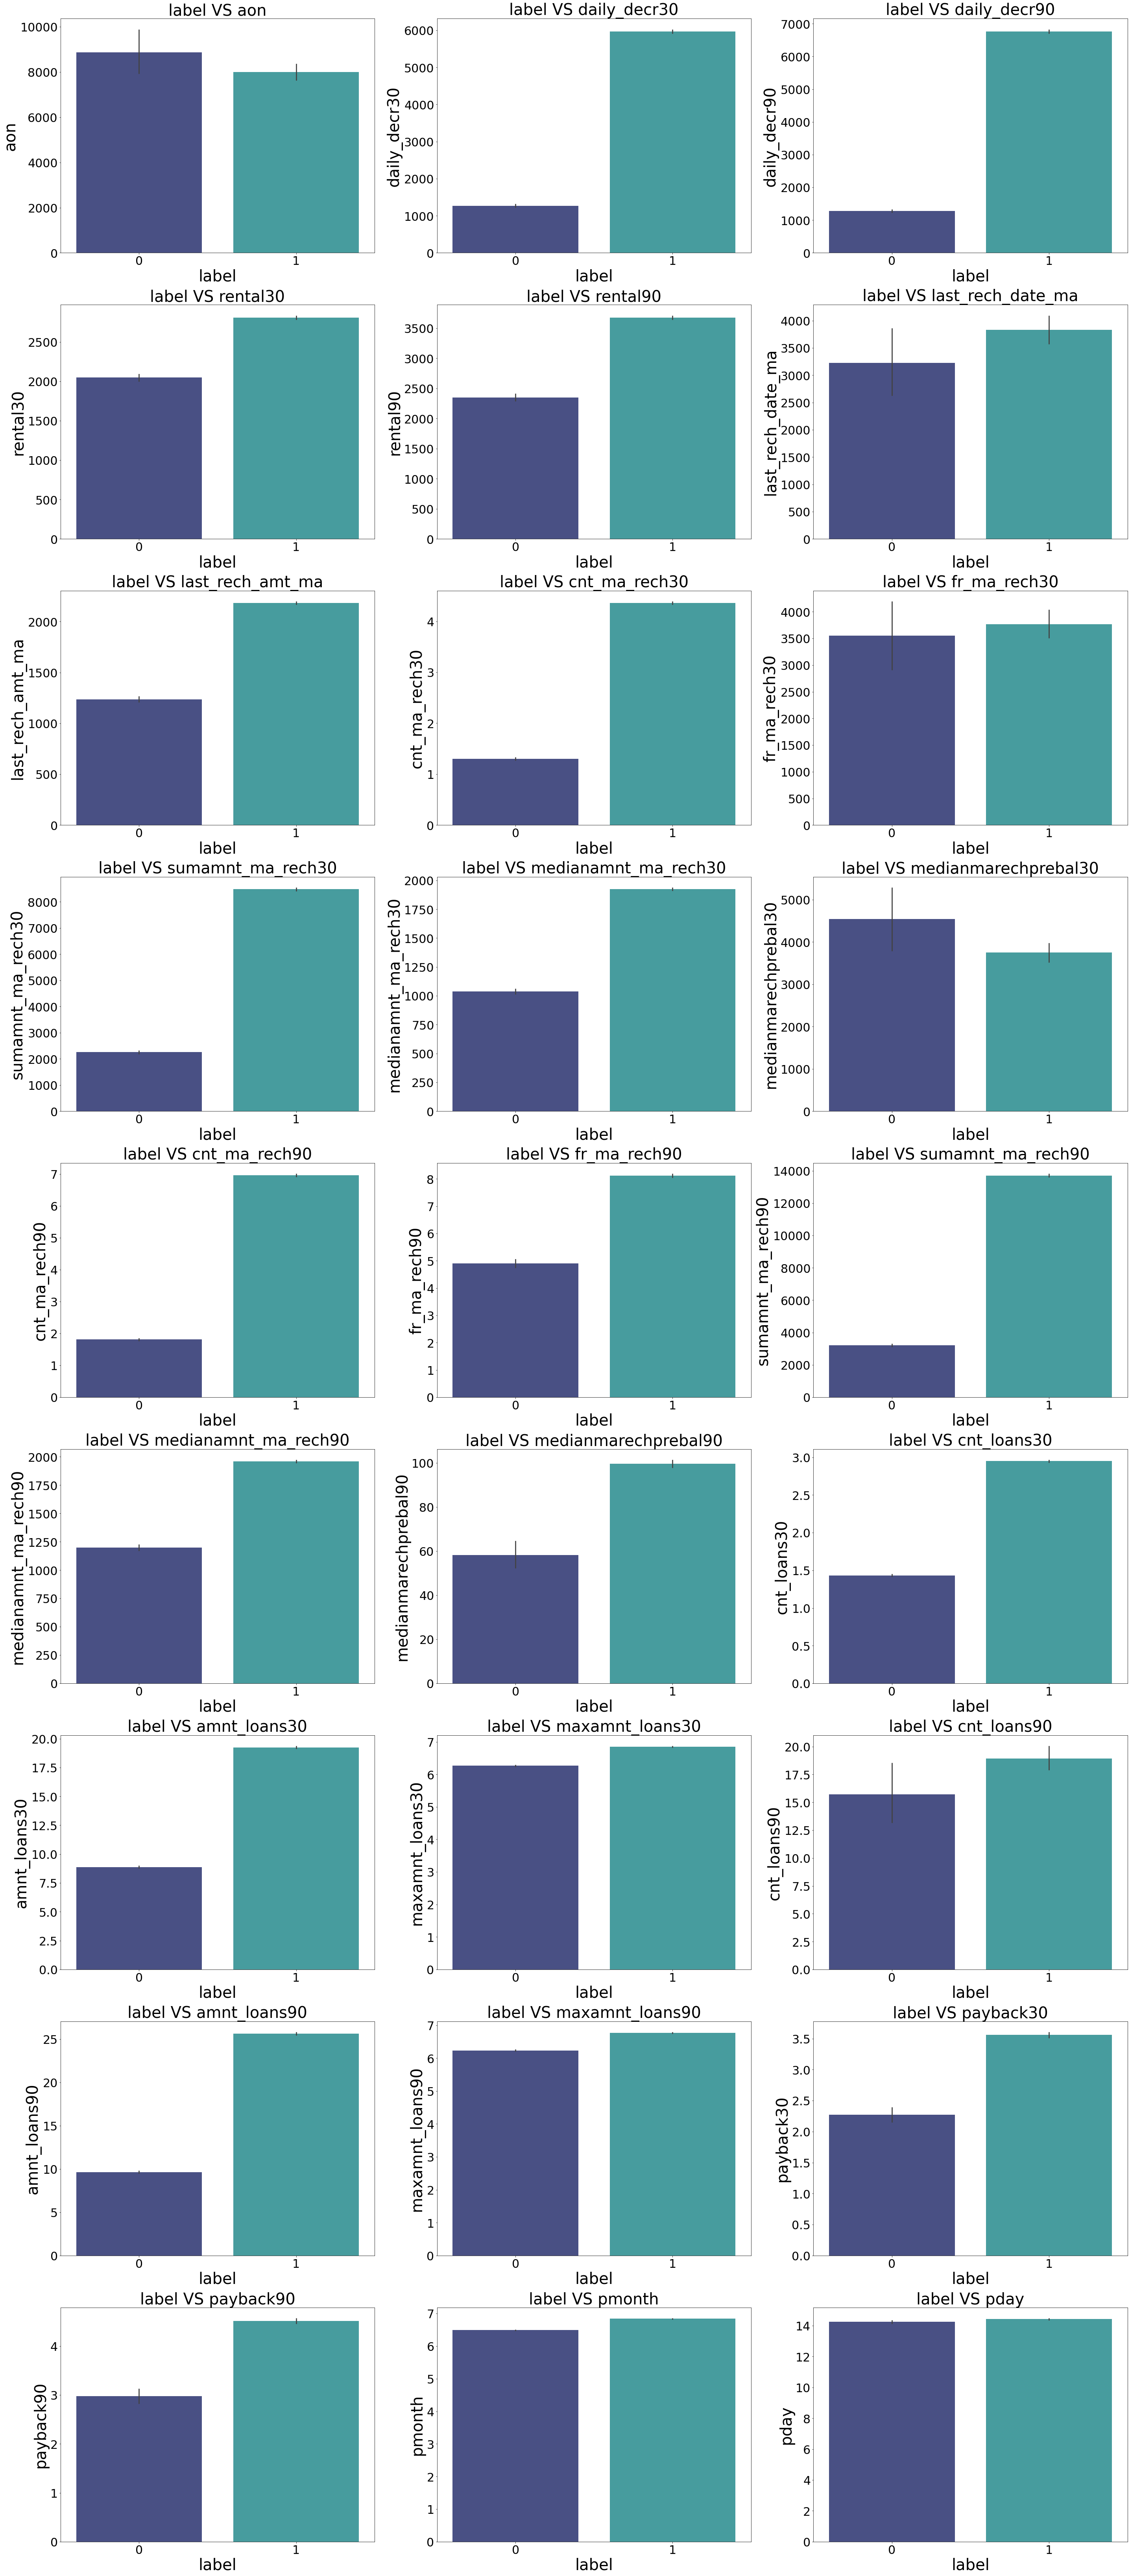

In [39]:
#barplot for numerical columns
plt.figure(figsize=(40,100))
for i in range(len(col)):
    plt.subplot(10,3,i+1)
    sns.barplot(x=df['label'], y=df[col[i]], palette="mako")
    plt.title(f"label VS {col[i]}",fontsize=40)
    plt.xticks(fontsize=30)  
    plt.yticks(fontsize=30)
    plt.xlabel('label',fontsize = 40)
    plt.ylabel(col[i],fontsize = 40)
    plt.tight_layout()

**OBSERVATIONS:**
- 1.Customers with high value of Age on cellular network in days(aon) are maximum defaulters(who have not paid there loan amount-0).
- 2.Customers with high value of Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)(daily_decr30) are maximum Non-defaulters(who have paid there loan amount-1).
- 3.Customers with high value of Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)(daily_decr90) are maximum Non-defaulters(who have paid there loan amount-1).
- 4.Customers with high value of Average main account balance over last 30 days(rental30) are maximum Non-defaulters(who have paid there loan amount-1).
- 5.Customers with high value of Average main account balance over last 90 days(rental90) are maximum Non-defaulters(who have paid there loan amount-1).
- 6.Customers with high Number of days till last recharge of main account(last_rech_date_ma) are maximum Non-defaulters(who have paid there loan amount-1).
- 7.Customers with high value of Amount of last recharge of main account (in Indonesian Rupiah)(last_rech_amt_ma) are maximum Non-defaulters(who have paid there loan amount-1).
- 8.Customers with high value of Number of times main account got recharged in last 30 days(cnt_ma_rech30) are maximum Non-defaulters(who have paid there loan amount-1).
- 9.Customers with high value of Frequency of main account recharged in last 30 days(fr_ma_rech30) are maximum Non-defaulters(who have paid there loan amount-1) and also the count is high for defaulters comparitively Non-defaulters are more in number.
- 10.Customers with high value of Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)(sumamnt_ma_rech30) are maximum Non-defaulters(who have paid there loan amount-1).
- 11.Customers with high value of Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)(medianamnt_ma_rech30) are maximum Non-defaulters(who have paid there loan amount-1).
- 12.Customers with high value of Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)(medianmarechprebal30) are maximum defaulters(who have not paid there loan amount-0).
- 13.Customers with high value of Number of times main account got recharged in last 90 days(cnt_ma_rech90) are maximum Non-defaulters(who have paid there loan amount-1).
- 14.Customers with high value of Frequency of main account recharged in last 90 days(fr_ma_rech90) are maximum Non-defaulters(who have paid there loan amount-1).
- 15.Customers with high value of Total amount of recharge in main account over last 90 days (in Indonasian Rupiah)(sumamnt_ma_rech90) are maximum Non-defaulters(who have paid there loan amount-1).
- 16.Customers with high value of Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah)(medianamnt_ma_rech90) are maximum Non-defaulters(who have paid there loan amount-1).
- 17.Customers with high value of Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)(medianmarechprebal90) are maximum Non-defaulters(who have paid there loan amount-1).
- 18.Customers with high value of Number of loans taken by user in last 30 days(cnt_loans30) are maximum Non-defaulters(who have paid there loan amount-1).
- 19.Customers with high value of Total amount of loans taken by user in last 30 days(amnt_loans30) are maximum Non-defaulters(who have paid there loan amount-1).
- 20.Customers with high value of maximum amount of loan taken by the user in last 30 days(maxamnt_loans30) are maximum Non-defaulters(who have paid there loan amount-1).
- 21.Customers with high value of Number of loans taken by user in last 90 days(cnt_loans90) are maximum Non-defaulters(who have paid there loan amount-1).
- 22.Customers with high value of Total amount of loans taken by user in last 90 days(amnt_loans90) are maximum Non-defaulters(who have paid there loan amount-1).
- 23.Customers with high value of maximum amount of loan taken by the user in last 90 days(maxamnt_loans90) are maximum Non-defaulters(who have paid there loan amount-1).
- 24.Customers with high value of Average payback time in days over last 30 days(payback30) are maximum Non-defaulters(who have paid there loan amount-1).
- 25.Customers with high value of Average payback time in days over last 90 days(payback90) are maximum Non-defaulters(who have paid there loan amount-1).
- 26.In between 6th and 7th month maximum customers both defualters and Non-defaulters have paid there loan amount.
- 27.Below 14th of each month all the customers have paid there loan amount.

# Data Cleaning:

# Checking for outliers:

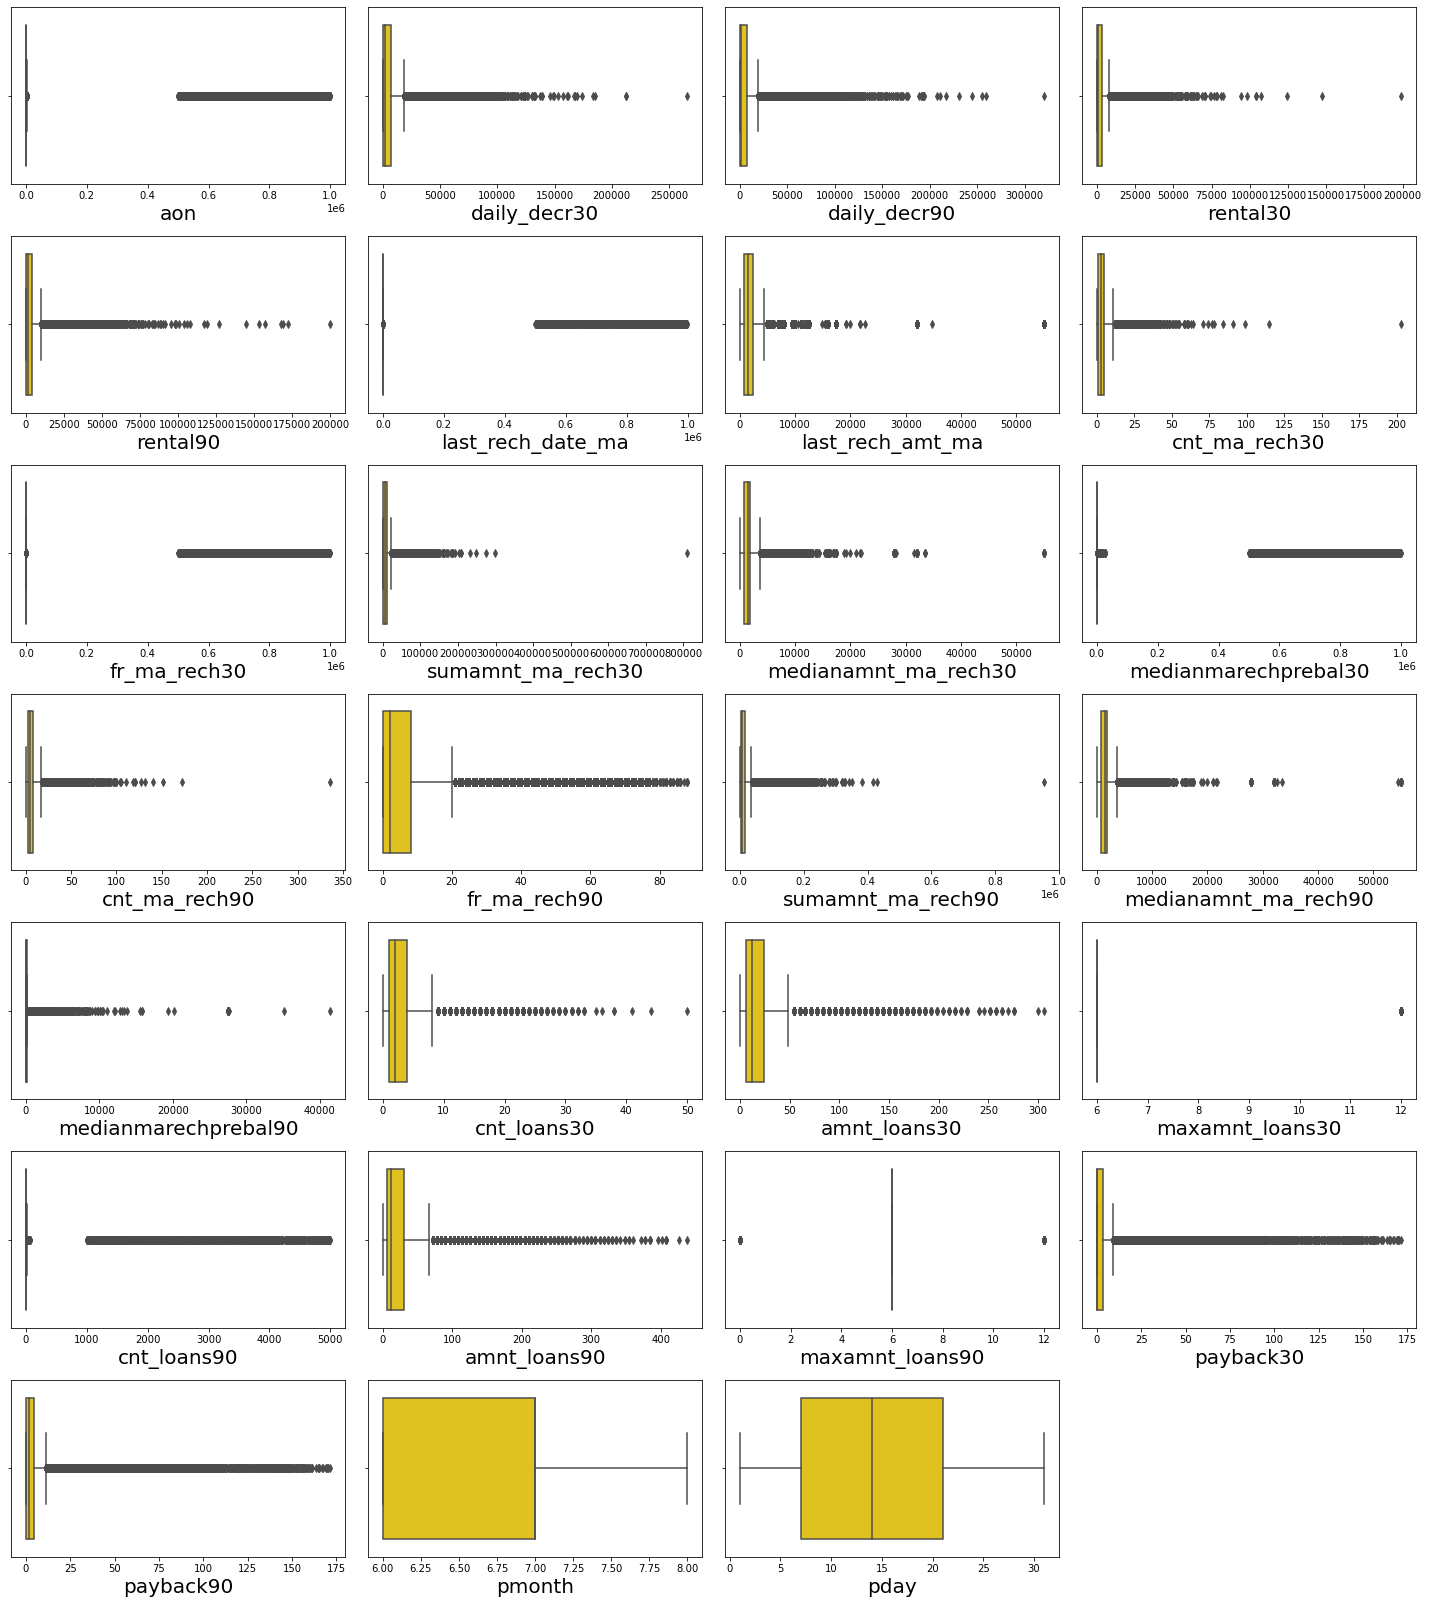

In [40]:
# Identifying the outliers using boxplot

plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in col:
    if plotnumber<=30:
        ax=plt.subplot(8,4,plotnumber)
        sns.boxplot(df[column],color='gold')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

There are outliers in almost all the columns except pmonth and pday.

# Removing Outliers:

# i) Zscore method:

In [41]:
#Features having outliers 
features=df[['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_loans30', 'amnt_loans30', 'maxamnt_loans30', 'cnt_loans90', 'amnt_loans90', 'maxamnt_loans90', 'payback30', 'payback90']]

Above are the list of columns with outliers in the dataset.

In [42]:
from scipy.stats import zscore
z=np.abs(zscore(features))
df_new=df[(z<3).all(axis=1)]
df_new.head()

<IPython.core.display.Javascript object>

label    aon  daily_decr30  daily_decr90  rental30  rental90  \
0      0  272.0   3055.050000   3065.150000    220.13    260.13   
1      1  712.0  12122.000000  12124.750000   3691.26   3691.26   
2      1  535.0   1398.000000   1398.000000    900.13    900.13   
3      1  241.0     21.228000     21.228000    159.42    159.42   
4      1  947.0    150.619333    150.619333   1098.90   1098.90   

   last_rech_date_ma  last_rech_amt_ma  cnt_ma_rech30  fr_ma_rech30  ...  \
0                2.0              1539              2          21.0  ...   
1               20.0              5787              1           0.0  ...   
2                3.0              1539              1           0.0  ...   
3               41.0               947              0           0.0  ...   
4                4.0              2309              7           2.0  ...   

   cnt_loans30  amnt_loans30  maxamnt_loans30  cnt_loans90  amnt_loans90  \
0            2            12                6          2.0            12   
1            1            12               12          1.0            12   
2            1             6                6          1.0             6   
3            2            12                6          2.0            12   
4            7            42                6          7.0            42   

   maxamnt_loans90  payback30  payback90  pmonth  pday  
0                6  29.000000  29.000000       7    20  
1               12   0.000000   0.000000       8    10  
2                6   0.000000   0.000000       8    19  
3                6   0.000000   0.000000       6     6  
4                6   2.333333   2.333333       6    22  

[5 rows x 28 columns]

In [43]:
#Checking shape of new dataset
df_new.shape

(172009, 28)

In my new dataset i have 170071 rows and 28 columns.

In [44]:
#Checking shape of old dataset
df.shape

(209593, 28)

In my old dataset i have 207550 rows and 28 columns.

In [45]:
#Checking dataloss in zscore method
Dataloss = (((207550-170071)/207550)*100)
Dataloss

18.05781739339918

In Z-score method the data loss is more than 10% so let me have a look into IQR method to remove outliers.

# ii) IQR method:

In [46]:
# 1st quantile
Q1=features.quantile(0.25)

# 3rd quantile
Q3=features.quantile(0.75)

# IQR
IQR=Q3 - Q1

df_1=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [47]:
#Checking shape of new dataset
df_1.shape

(78347, 28)

In my new dataset i have 78654 rows and 28 columns.

In [48]:
#Checking shape of old dataset
df.shape

(209593, 28)

In my old dataset i have 207550 rows and 28 columns.

In [49]:
#Checking dataloss in IQR method of the dataset
Dataloss = (((207550-78654)/207550)*100)
Dataloss

62.103589496506864

In IQR method the data loss is more than 10% so let me have a look into percentile method to remove outliers.

# iii) Percentile Method:

In [50]:
#Removing outliers using percentile method
for colu in features:
    if df[colu].dtypes != 'object':
        percentile = df[colu].quantile([0.01,0.98]).values
        df[colu][df[colu]<=percentile[0]]=percentile[0]
        df[colu][df[colu]>=percentile[1]]=percentile[1]

I have successfully removed outliers in the dataset using percentile method.

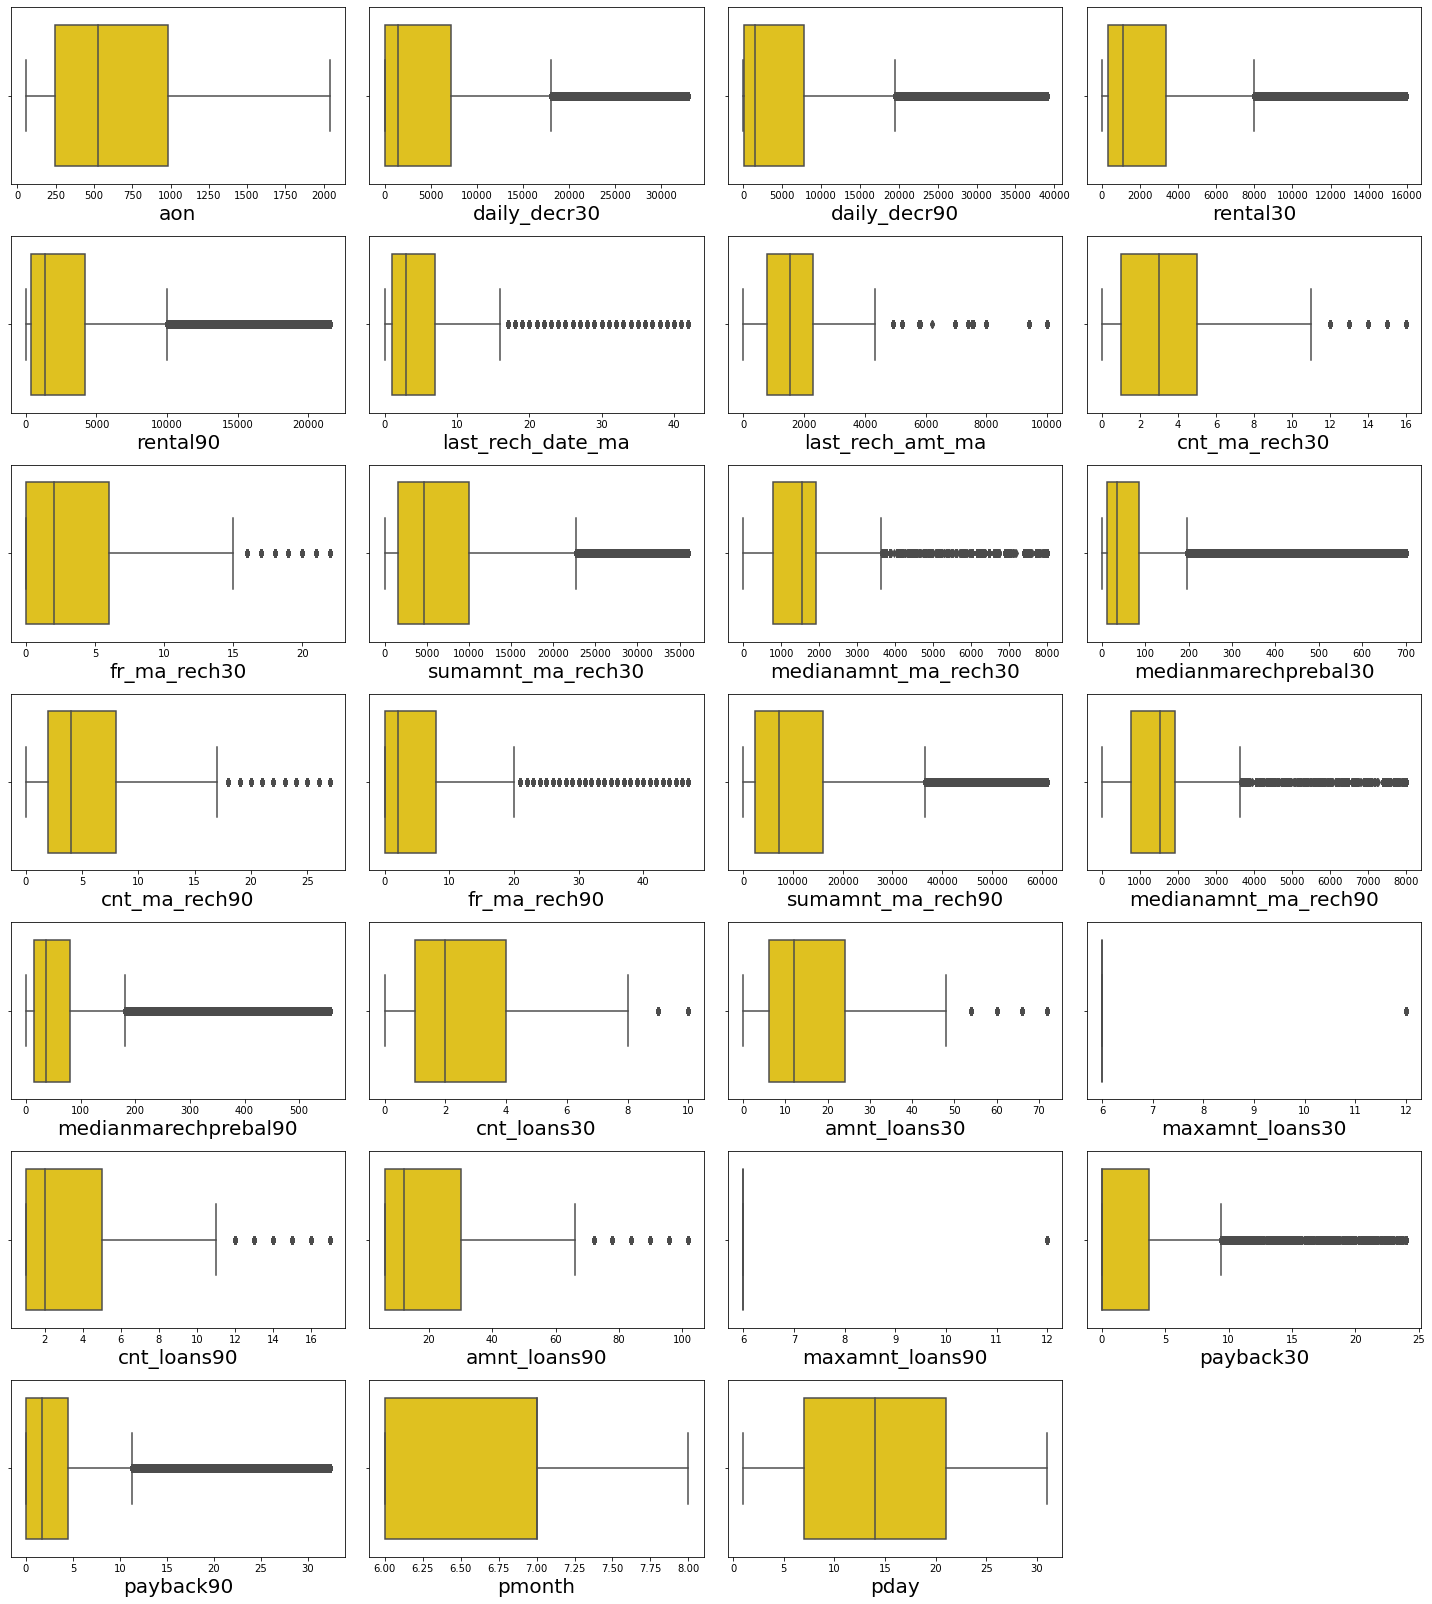

In [51]:
# Checking if the outliers is reduced or not

plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in col:
    if plotnumber<=30:
        ax=plt.subplot(8,4,plotnumber)
        sns.boxplot(df[column],color='gold')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

Outliers has reduced in all the columns.

# Checking for skewness:

In [52]:
#Checking for skewness in the dataset
df.skew()

label                  -2.270254
aon                     0.935197
daily_decr30            1.974398
daily_decr90            2.091663
rental30                2.115274
rental90                2.203455
last_rech_date_ma       2.541537
last_rech_amt_ma        2.080016
cnt_ma_rech30           1.415594
fr_ma_rech30            1.703205
sumamnt_ma_rech30       1.750999
medianamnt_ma_rech30    2.115971
medianmarechprebal30    2.812125
cnt_ma_rech90           1.569282
fr_ma_rech90            1.985638
sumamnt_ma_rech90       1.863547
medianamnt_ma_rech90    2.133303
medianmarechprebal90    2.639138
cnt_loans30             1.576547
amnt_loans30            1.733837
maxamnt_loans30         2.206135
cnt_loans90             1.923139
amnt_loans90            1.840032
maxamnt_loans90         2.241299
payback30               2.648819
payback90               2.829305
pmonth                  0.343242
pday                    0.199845
dtype: float64

There is skewness in almost all columns except pmonth,pday and as label is my target i should not remove skewness from this column.

# Removing skewness using yeo-johnson method:

In [53]:
#Creating a list of skewed features
fea=['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_loans30', 'amnt_loans30', 'maxamnt_loans30', 'cnt_loans90', 'amnt_loans90', 'maxamnt_loans90', 'payback30', 'payback90']

Taking a list as fea with all the columns with skewness.

In [54]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box_cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box_cox' or 'yeo-johnson'\n"

Using yeo_johnson method i am removing the skewness.

In [55]:
df[fea] = scaler.fit_transform(df[fea].values)

Got removed from skewness.

In [56]:
#Checking skewness again
df[fea].skew()

aon                    -0.059160
daily_decr30           -0.141351
daily_decr90           -0.130982
rental30               -0.063274
rental90               -0.063135
last_rech_date_ma       0.044329
last_rech_amt_ma       -0.096659
cnt_ma_rech30          -0.010127
fr_ma_rech30            0.133182
sumamnt_ma_rech30      -0.369884
medianamnt_ma_rech30   -0.239052
medianmarechprebal30   -0.045899
cnt_ma_rech90          -0.012068
fr_ma_rech90            0.140655
sumamnt_ma_rech90      -0.265438
medianamnt_ma_rech90   -0.100228
medianmarechprebal90   -0.029268
cnt_loans30             0.042626
amnt_loans30            0.006048
maxamnt_loans30         0.000000
cnt_loans90             0.206928
amnt_loans90            0.133935
maxamnt_loans90         0.000000
payback30               0.287988
payback90               0.201580
dtype: float64

Skewness in all the columns has been reduced.

# Checking correlation using heat map:

In [57]:
cor=df.corr()
cor

label       aon  daily_decr30  daily_decr90  \
label                 1.000000  0.096267      0.267056      0.269522   
aon                   0.096267  1.000000      0.115717      0.116326   
daily_decr30          0.267056  0.115717      1.000000      0.998328   
daily_decr90          0.269522  0.116326      0.998328      1.000000   
rental30              0.142204  0.083372      0.583840      0.584062   
rental90              0.156705  0.091223      0.640817      0.645831   
last_rech_date_ma     0.065764  0.062095      0.124668      0.128715   
last_rech_amt_ma      0.261558  0.097955      0.376118      0.375746   
cnt_ma_rech30         0.344106  0.037108      0.495417      0.490856   
fr_ma_rech30          0.241559  0.069588      0.296000      0.295068   
sumamnt_ma_rech30     0.358799  0.080562      0.554458      0.549137   
medianamnt_ma_rech30  0.277643  0.097277      0.388880      0.385740   
medianmarechprebal30  0.264868  0.057026      0.274642      0.273267   
cnt_ma_rech90         0.361987  0.058066      0.627033      0.630612   
fr_ma_rech90          0.220134  0.075321      0.219822      0.220905   
sumamnt_ma_rech90     0.368684  0.097926      0.663845      0.666929   
medianamnt_ma_rech90  0.252438  0.103318      0.366157      0.366491   
medianmarechprebal90  0.256673  0.058464      0.244357      0.245195   
cnt_loans30           0.234579  0.073933      0.341657      0.335047   
amnt_loans30          0.233895  0.074585      0.394816      0.388839   
maxamnt_loans30       0.096316  0.036355      0.391032      0.393150   
cnt_loans90           0.287740  0.116080      0.517784      0.518885   
amnt_loans90          0.302689  0.118641      0.571143      0.572560   
maxamnt_loans90       0.099686  0.038817      0.403148      0.406070   
payback30             0.232627  0.081135      0.328779      0.326097   
payback90             0.240341  0.111311      0.404245      0.404871   
pmonth                0.154949  0.086131      0.816993      0.830246   
pday                  0.006825  0.016448     -0.009166     -0.016237   

                      rental30  rental90  last_rech_date_ma  last_rech_amt_ma  \
label                 0.142204  0.156705           0.065764          0.261558   
aon                   0.083372  0.091223           0.062095          0.097955   
daily_decr30          0.583840  0.640817           0.124668          0.376118   
daily_decr90          0.584062  0.645831           0.128715          0.375746   
rental30              1.000000  0.973267           0.054789          0.284288   
rental90              0.973267  1.000000           0.088574          0.295280   
last_rech_date_ma     0.054789  0.088574           1.000000          0.517311   
last_rech_amt_ma      0.284288  0.295280           0.517311          1.000000   
cnt_ma_rech30         0.454494  0.445557          -0.021157          0.321219   
fr_ma_rech30          0.248022  0.249853           0.057784          0.271814   
sumamnt_ma_rech30     0.481511  0.470255           0.114665          0.652559   
medianamnt_ma_rech30  0.322414  0.313758           0.324497          0.811083   
medianmarechprebal30  0.224414  0.220681           0.188150          0.426718   
cnt_ma_rech90         0.509933  0.537415           0.095034          0.373169   
fr_ma_rech90          0.161965  0.175607           0.218692          0.336927   
sumamnt_ma_rech90     0.518253  0.544569           0.249151          0.701542   
medianamnt_ma_rech90  0.272765  0.283442           0.507089          0.902139   
medianmarechprebal90  0.179244  0.188766           0.336528          0.490801   
cnt_loans30           0.311012  0.294167          -0.106417          0.144867   
amnt_loans30          0.341526  0.329390          -0.107861          0.164279   
maxamnt_loans30       0.267116  0.291442           0.012245          0.178615   
cnt_loans90           0.417471  0.435248          -0.032599          0.211549   
amnt_loans90          0.447287  0.468701          -0.028060          0.24

Above are the correlations of all the pair of features.To get better visualization on the correlation of features,let me plot it using heat map.

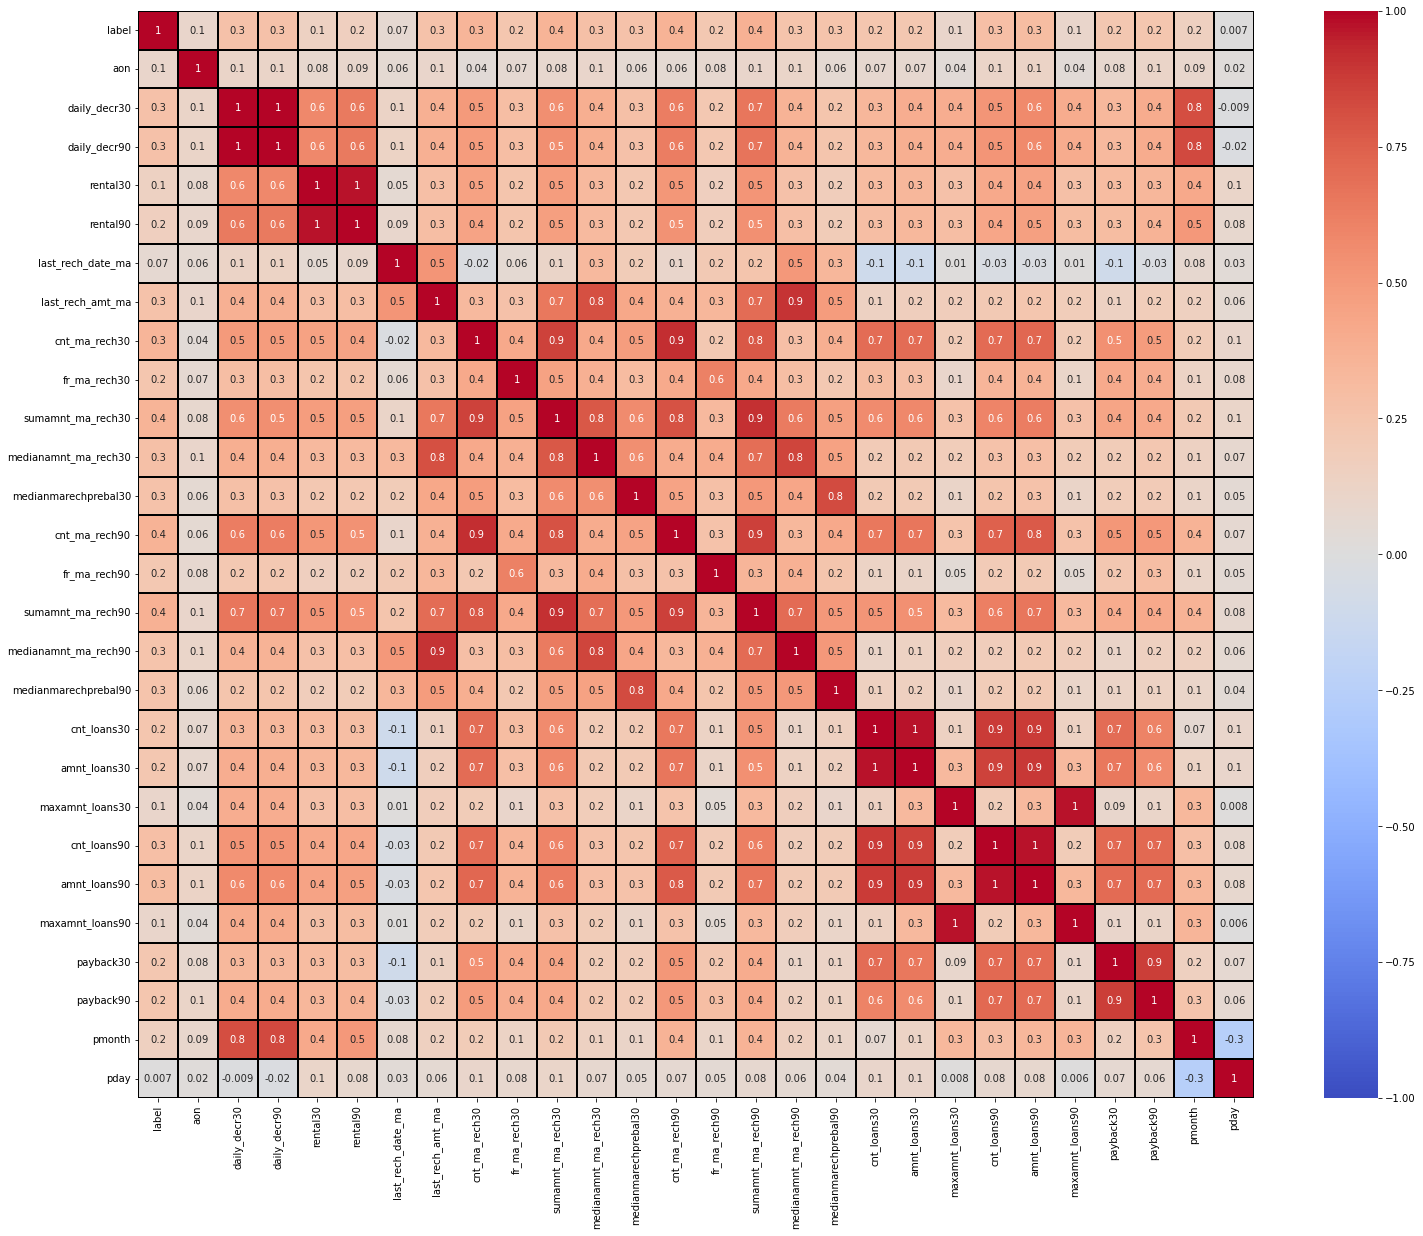

In [58]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor="black",annot_kws={'size':10},cmap="coolwarm")
plt.yticks(rotation=0);

Let's visualize the correlation of all the features with target to get better insight.

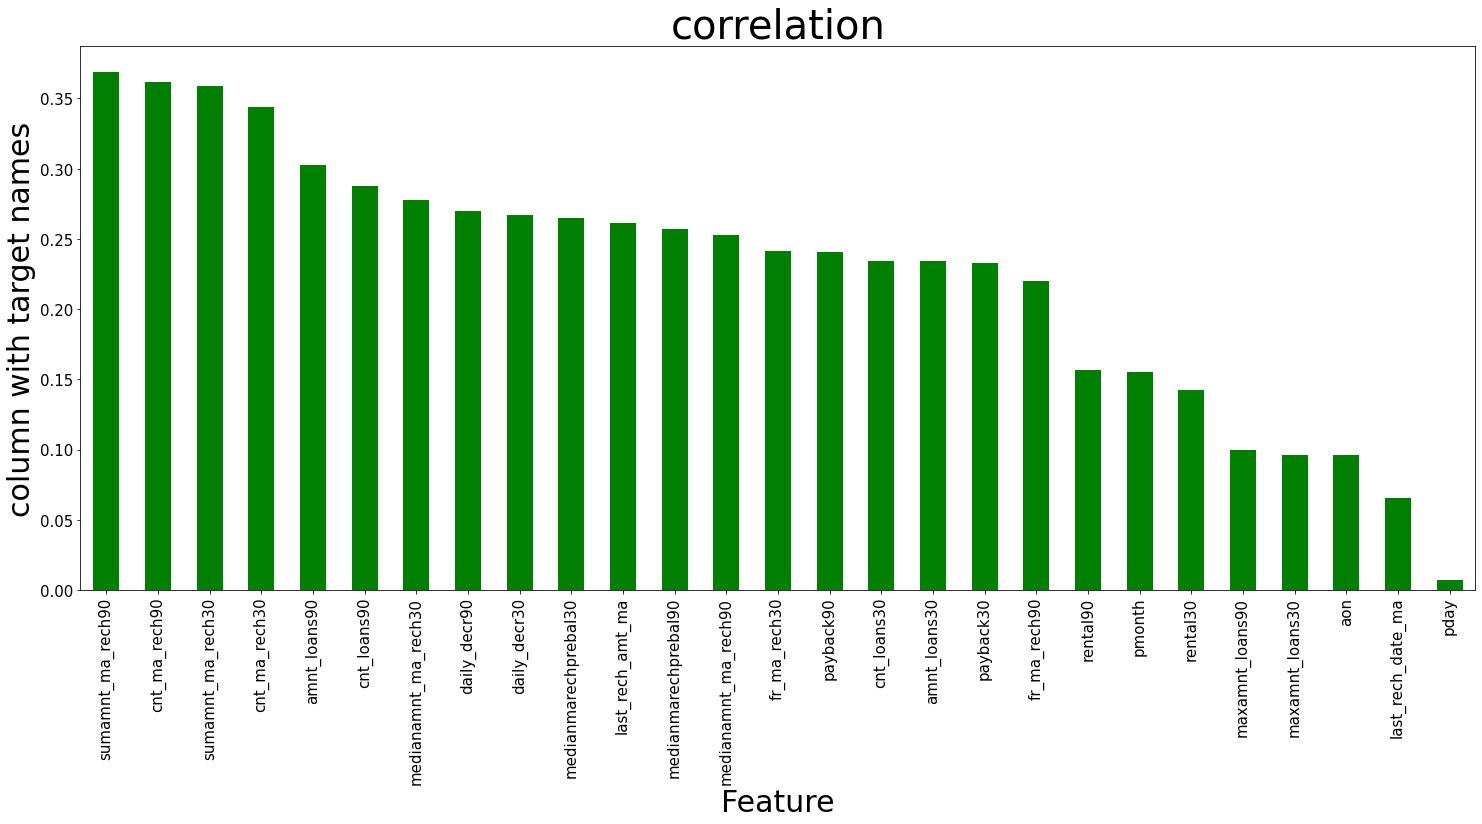

In [59]:
plt.figure(figsize=(25,10))
df.corr()['label'].sort_values(ascending=False).drop(['label']).plot(kind='bar',color='g')
plt.xlabel('Feature',fontsize=30)
plt.ylabel('column with target names',fontsize=30)
plt.xticks(fontsize=15)  
plt.yticks(fontsize=15)
plt.title('correlation',fontsize=40)
plt.show()

We don't find any columns with negligible correlation. Even though pday is less correlated we can keep it and preceed.

# Separating Features and Target:

In [60]:
def split (data,target):
    data_reset_index = data.reset_index(drop=True)
# Data split
    global x
    global y
    global x_train
    global y_train
    global x_test
    global y_test
# Segregate Feature & Target Variables
    x = data_reset_index.drop(target, axis=1)
    y = data_reset_index[target]
    x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=3)
    
    print(x_train.info())
    ("\n")
    print(x_test.info())
    ("\n")
    print(y_train.shape)
    ("\n")
    print(y_test.shape)
    ("\n")

In [61]:
split(data=df,
      target="label")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146715 entries, 137536 to 71530
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   aon                   146715 non-null  float64
 1   daily_decr30          146715 non-null  float64
 2   daily_decr90          146715 non-null  float64
 3   rental30              146715 non-null  float64
 4   rental90              146715 non-null  float64
 5   last_rech_date_ma     146715 non-null  float64
 6   last_rech_amt_ma      146715 non-null  float64
 7   cnt_ma_rech30         146715 non-null  float64
 8   fr_ma_rech30          146715 non-null  float64
 9   sumamnt_ma_rech30     146715 non-null  float64
 10  medianamnt_ma_rech30  146715 non-null  float64
 11  medianmarechprebal30  146715 non-null  float64
 12  cnt_ma_rech90         146715 non-null  float64
 13  fr_ma_rech90          146715 non-null  float64
 14  sumamnt_ma_rech90     146715 non-null  float64
 

I have separated my target and independent columns.

# Balancing the target variable using oversampling:

In [62]:
#Checking the value count of target column
y.value_counts()

1    183431
0     26162
Name: label, dtype: int64

In [63]:
# Smote
sm = SMOTE(random_state = 5)

columns = x_train.columns

train_data = pd.concat([x_train,y_train], axis = 1)

train_data.head()

# Fitting the model
x_os_train, y_os_train  = sm.fit_resample(train_data.drop('label', axis = 1), train_data['label'])

y_os_train.value_counts()

<IPython.core.display.Javascript object>

0    128358
1    128358
Name: label, dtype: int64

In [64]:
## Number of records in Oversampled Train dataset

print('the number of records in x_os_train :', len(x_os_train))
print('the number of records in y_os_train :', len(y_os_train))
print('the number of records in x_test :', len(x_test))
print('the number of records in y_test :', len(y_test))

# Target Class Distribution for Train and test Dataset

print('the ratio of 0 and 1 in y_os_train:')

print(y_os_train.value_counts(normalize = True)*100)

print('the ratio of 0 and 1 in y_test:')

print(y_test.value_counts(normalize = True)*100)

print("Before UpSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before UpSampling, counts of label '0': {} \n".format(sum(y_train==0)))

print("After UpSampling, counts of label '1': {}".format(sum(y_os_train==1)))
print("After UpSampling, counts of label '0': {} \n".format(sum(y_os_train==0)))

the number of records in x_os_train : 256716
the number of records in y_os_train : 256716
the number of records in x_test : 62878
the number of records in y_test : 62878
the ratio of 0 and 1 in y_os_train:
0    50.0
1    50.0
Name: label, dtype: float64
the ratio of 0 and 1 in y_test:
1    87.587073
0    12.412927
Name: label, dtype: float64
Before UpSampling, counts of label '1': 128358
Before UpSampling, counts of label '0': 18357 

After UpSampling, counts of label '1': 128358
After UpSampling, counts of label '0': 128358 



<AxesSubplot:xlabel='label', ylabel='count'>

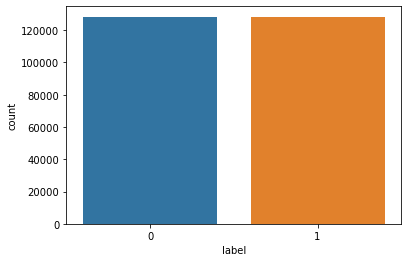

In [65]:
# Visualizing the target data after oversampling
sns.countplot(y_os_train)

Now the data is balanced.

# Scaling the data:

In [66]:
scale_1= StandardScaler()
scale_2= MinMaxScaler()
scale_3= RobustScaler()
model= LinearRegression()

<IPython.core.display.Javascript object>

In [67]:
pipe1 = Pipeline([
    ('Scale',scale_1),
    ('model',model),
])    
pipe2 = Pipeline([
    ('Scale',scale_2),
    ('model',model),
])
pipe3 = Pipeline([
    ('Scale',scale_3),
    ('model',model),  
    
])

In [68]:
# Create Function Name 
def pre_process3(data, pipe):

# Pipe.fit, pipe.predict and accuracy
    
    pipe.fit(x_train,y_train)
    
    y_pred = pipe.predict(x_test)
    
    score = np.sqrt(metrics.mean_squared_error(y_pred, y_test))
    
    return score

In [69]:
pre_process3(data= df,
           pipe= pipe1)

<IPython.core.display.Javascript object>

0.2967656216770289

In [70]:
pre_process3(data= df,
           pipe= pipe2)

<IPython.core.display.Javascript object>

0.2967656216770289

In [71]:
pre_process3(data= df,
           pipe= pipe3)

<IPython.core.display.Javascript object>

0.2967656217431527

I am using MinMax Scaler

In [72]:
scalar= MinMaxScaler()
scalar.fit(x_train)
x_trainsc =  scalar.transform(x_os_train)
x_testsc  =  scalar.transform(x_test)

### Principal Component Analysis (PCA)

In [73]:
pca = PCA(n_components = 0.5)
pca.fit(x_trainsc)
x_train_model = pca.transform(x_trainsc)
x_test_model = pca.transform(x_testsc)
ex_variance=np.var(x_train_model,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)

print("shape of x_train_pca", x_train_model.shape)
print('')    
print("Explained Variance Ratio for Training Dataset: \n", ex_variance_ratio)

print(" ")

ex_variance_1 = np.var(x_test_model , axis=0)
ex_variance_ratio_1 = ex_variance_1 / np.sum(ex_variance_1)
    
print("Explained Variance Ratio for Test Dataset: \n", ex_variance_ratio_1) 
print(" ")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

shape of x_train_pca (256716, 2)

Explained Variance Ratio for Training Dataset: 
 [0.80166828 0.19833172]
 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Explained Variance Ratio for Test Dataset: 
 [0.76667228 0.23332772]
 


## Model Building

### Naive Baye's 

In [74]:
nb_model          =      GaussianNB()

## Model.fit

nb_model.fit(x_trainsc, y_os_train)

## Model.predict


y_pred_nb_0 = nb_model.predict(x_testsc)

### Naive Bayes

conf_matrix_nb = confusion_matrix(y_test, y_pred_nb_0, labels=[0, 1])

df_cmatrix_nb = pd.DataFrame(conf_matrix_nb, index = [i for i in [0, 1]],
                  columns = [i for i in ["Predict_Rejected","Predict_Accepted"]])


fig_cmatrix_nb = px.imshow(df_cmatrix_nb , title = "Confusion Matrix for NB Classifier Model")

## Saving the Classification Reports : precision, recall, f1-score ##


pred_report_nb = classification_report(y_test, y_pred_nb_0 , digits=2)

### NB Classifier

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,  y_pred_nb_0)
roc_nb = auc(false_positive_rate, true_positive_rate)


print("The Accuracy Score For The NB Classifier Model Is :  ", accuracy_score(y_test, y_pred_nb_0))
print("\n")
print("The roc_auc score for NB Classifier Model:  ", roc_nb)



##  Confusion Matrices 


fig_cmatrix_nb.show()

### Classification Reports 

print("Title : The Classification Report for NB Classifier Model: \n  ", pred_report_nb)

<IPython.core.display.Javascript object>

The Accuracy Score For The NB Classifier Model Is :   0.7400044530678457


The roc_auc score for NB Classifier Model:   0.755634106652433


Title : The Classification Report for NB Classifier Model: 
                 precision    recall  f1-score   support

           0       0.29      0.78      0.43      7805
           1       0.96      0.73      0.83     55073

    accuracy                           0.74     62878
   macro avg       0.63      0.76      0.63     62878
weighted avg       0.88      0.74      0.78     62878



In [75]:
##### K Fold Cross Validation ####
    
cross_valid = True
cv_score = cross_val_score(nb_model , x , y, scoring = 'accuracy', 
                                          cv = KFold(n_splits = 10))
accuracy = accuracy_score(y_test, y_pred_nb_0)

print("The Cross Validation Score For Baseline Naive Baye's Model Classifier Model After", "Fold Cross Validation Is :  \n", cv_score)
print(" ")
print("The Accuracy Score For Baseline Naive Baye's Model Classifier Model After Cross Validation Is: \n", accuracy)

The Cross Validation Score For Baseline Naive Baye's Model Classifier Model After Fold Cross Validation Is :  
 [0.77876908 0.77762405 0.77251908 0.77627749 0.7747507  0.77804285
 0.78014218 0.77966506 0.77990362 0.77947421]
 
The Accuracy Score For Baseline Naive Baye's Model Classifier Model After Cross Validation Is: 
 0.7400044530678457


In [76]:
# Best Hyperparameter tuning
cv_method = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=100)
params_NB = {'var_smoothing': np.logspace(100,-100, num=1000)}

gs_NB = GridSearchCV(estimator=nb_model, 
                     param_grid=params_NB, 
                     cv=3,
                     verbose=1, 
                     scoring='accuracy')

Data_transformed = PowerTransformer().fit_transform(x_testsc)

gs_NB.fit(Data_transformed, y_test)

# Best Parameters
print(" The Best Hyperparameter is : ",gs_NB.best_params_)

# Best Score
print(" The Best score is : ",gs_NB.best_score_)

<IPython.core.display.Javascript object>

Fitting 3 folds for each of 1000 candidates, totalling 3000 fits
 The Best Hyperparameter is :  {'var_smoothing': 1e+100}
 The Best score is :  0.8758707339921017


In [77]:
nb_model2          =      GaussianNB(var_smoothing=1e+100)

## Model.fit

nb_model2.fit(x_trainsc, y_os_train)

## Model.predict


y_pred_nb_0 = nb_model2.predict(x_testsc)

### Naive Bayes

conf_matrix_nb = confusion_matrix(y_test, y_pred_nb_0, labels=[0, 1])

df_cmatrix_nb = pd.DataFrame(conf_matrix_nb, index = [i for i in [0, 1]],
                  columns = [i for i in ["Predict_Rejected","Predict_Accepted"]])


fig_cmatrix_nb = px.imshow(df_cmatrix_nb , title = "Confusion Matrix for NB Classifier Model")

## Saving the Classification Reports : precision, recall, f1-score ##


pred_report_nb = classification_report(y_test, y_pred_nb_0 , digits=2)

### NB Classifier

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,  y_pred_nb_0)
roc_nb = auc(false_positive_rate, true_positive_rate)


print("The Accuracy Score For The NB Classifier Model Is :  ", accuracy_score(y_test, y_pred_nb_0))
print("\n")
print("The roc_auc score for NB Classifier Model:  ", roc_nb)



##  Confusion Matrices 


fig_cmatrix_nb.show()

### Classification Reports 

print("Title : The Classification Report for NB Classifier Model: \n  ", pred_report_nb)


<IPython.core.display.Javascript object>

The Accuracy Score For The NB Classifier Model Is :   0.12412926619803429


The roc_auc score for NB Classifier Model:   0.5


Title : The Classification Report for NB Classifier Model: 
                 precision    recall  f1-score   support

           0       0.12      1.00      0.22      7805
           1       0.00      0.00      0.00     55073

    accuracy                           0.12     62878
   macro avg       0.06      0.50      0.11     62878
weighted avg       0.02      0.12      0.03     62878



### Linear Discriminant Analysis Model (LDA)

In [78]:
# Training the model
lda_model         =      LinearDiscriminantAnalysis()

## Model.fit

lda_model.fit(x_trainsc, y_os_train)

## Model.predict

y_lda_0 = lda_model.predict(x_testsc)

## Linear Discriminant Analysis Model


conf_matrix_lda =  confusion_matrix(y_test, y_lda_0 , labels=[0, 1])

df_cmatrix_lda   = pd.DataFrame(conf_matrix_lda , index = [i for i in [0, 1]],
                  columns = [i for i in ["Predict_Rejected","Predict_Accepted"]])


fig_cmatrix_lda = px.imshow(df_cmatrix_lda , title = "Confusion Matrix for Baseline Linear Discriminant Analysis Model")

## Saving the Classification Reports : precision, recall, f1-score ##

pred_report_lda = classification_report(y_test, y_lda_0 , digits=2)

### Saving the ROC_AUC Scores for Algorithms

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_lda_0)
roc_lda = auc(false_positive_rate, true_positive_rate)

#### Printing the Accuracy Scores 

print("The Accuracy Score For The Linear Discriminant Analysis Model Is :  ",   
      accuracy_score(y_test, y_lda_0))

##  Confusion Matrices 

fig_cmatrix_lda.show()

### Classification Reports 

print("Title : The Classification Report for Linear Discriminant Model: \n  ", pred_report_lda)

###  roc_auc scores 

print("The roc_auc score for Linear Discriminat Analysis Model:  ", roc_lda)

<IPython.core.display.Javascript object>

The Accuracy Score For The Linear Discriminant Analysis Model Is :   0.7631285982378574


Title : The Classification Report for Linear Discriminant Model: 
                 precision    recall  f1-score   support

           0       0.32      0.78      0.45      7805
           1       0.96      0.76      0.85     55073

    accuracy                           0.76     62878
   macro avg       0.64      0.77      0.65     62878
weighted avg       0.88      0.76      0.80     62878

The roc_auc score for Linear Discriminat Analysis Model:   0.7693296113539966


In [79]:
##### K Fold Cross Validation ####
    
cross_valid = True
cv_score = cross_val_score(lda_model , x , y, scoring = 'accuracy', 
                                          cv = KFold(n_splits = 10))
accuracy = accuracy_score(y_test, y_lda_0)

print("The Cross Validation Score For Baseline Linear Discriminant Model After", "Fold Cross Validation Is :  \n", cv_score)
print(" ")
print("The Accuracy Score For Baseline Linear Discriminant Model After Cross Validation Is: \n", accuracy)

The Cross Validation Score For Baseline Linear Discriminant Model After Fold Cross Validation Is :  
 [0.87013359 0.87142176 0.86622137 0.87112935 0.86883916 0.86917315
 0.8728947  0.86917315 0.87022282 0.87508946]
 
The Accuracy Score For Baseline Linear Discriminant Model After Cross Validation Is: 
 0.7631285982378574


In [80]:
# Best Hyperparameter Tuning
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
solver= ['svd','lsqr','eigen']
n_components= np.logspace(10,-10, num=10)
tol=np.logspace(100,-100, num=10)
param_grid = dict(solver= solver,
                   n_components= n_components,
                   tol=tol)

gs_lda = GridSearchCV(estimator=lda_model, 
                     param_grid=param_grid, 
                     cv=3,
                     verbose=1, 
                     scoring='accuracy')

Data_transformed = PowerTransformer().fit_transform(x_testsc)

gs_lda.fit(Data_transformed, y_test)

print("The Best Parameters are: ","\n",gs_lda.best_params_)
print("The Best score is: ","\n",gs_lda.best_score_)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Fitting 3 folds for each of 300 candidates, totalling 900 fits
The Best Parameters are:  
 {'n_components': 0.07742636826811278, 'solver': 'lsqr', 'tol': 1e+100}
The Best score is:  
 0.8741212578247097


In [81]:
# Training the model
lda_model2 = LinearDiscriminantAnalysis(n_components= 0.07742636826811278, solver='lsqr', store_covariance=True,tol=1e+100)

## Model.fit

lda_model2.fit(x_trainsc, y_os_train)

## Model.predict

y_lda_0 = lda_model2.predict(x_testsc)

## Linear Discriminant Analysis Model


conf_matrix_lda =  confusion_matrix(y_test, y_lda_0 , labels=[0, 1])

df_cmatrix_lda   = pd.DataFrame(conf_matrix_lda , index = [i for i in [0, 1]],
                  columns = [i for i in ["Predict_Rejected","Predict_Accepted"]])


fig_cmatrix_lda = px.imshow(df_cmatrix_lda , title = "Confusion Matrix for Baseline Linear Discriminant Analysis Model")

## Saving the Classification Reports : precision, recall, f1-score ##

pred_report_lda = classification_report(y_test, y_lda_0 , digits=2)

### Saving the ROC_AUC Scores for Algorithms

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_lda_0)
roc_lda = auc(false_positive_rate, true_positive_rate)

#### Printing the Accuracy Scores 

print("The Accuracy Score For The Linear Discriminant Analysis Model Is :  ",   
      accuracy_score(y_test, y_lda_0))

##  Confusion Matrices 

fig_cmatrix_lda.show()

### Classification Reports 

print("Title : The Classification Report for Linear Discriminant Model: \n  ", pred_report_lda)

###  roc_auc scores 

print("The roc_auc score for Linear Discriminat Analysis Model:  ", roc_lda)

<IPython.core.display.Javascript object>

The Accuracy Score For The Linear Discriminant Analysis Model Is :   0.7631285982378574


Title : The Classification Report for Linear Discriminant Model: 
                 precision    recall  f1-score   support

           0       0.32      0.78      0.45      7805
           1       0.96      0.76      0.85     55073

    accuracy                           0.76     62878
   macro avg       0.64      0.77      0.65     62878
weighted avg       0.88      0.76      0.80     62878

The roc_auc score for Linear Discriminat Analysis Model:   0.7693296113539966


### Quadratic Discriminant Analysis Model (QDA)

In [82]:
# Training the Model

qda_model         =      QuadraticDiscriminantAnalysis()

## Model.fit

qda_model.fit(x_trainsc, y_os_train)

## Model.predict

y_qda_0 = qda_model.predict(x_testsc)

## Quadratic Discriminant Analysis Model

conf_matrix_qda = confusion_matrix(y_test, y_qda_0 , labels=[0, 1])

df_cmatrix_qda = pd.DataFrame(conf_matrix_qda, index = [i for i in [0, 1]],
                  columns = [i for i in ["Predict_Rejected","Predict_Accepted"]])


fig_cmatrix_qda = px.imshow(df_cmatrix_qda , title = "Confusion Matrix for Baseline Quadratic Discriminant Analysis Model")

## Saving the Classification Reports : precision, recall, f1-score ##

pred_report_qda = classification_report(y_test, y_qda_0 , digits=2)

### Saving the ROC_AUC Scores for Baseline Algorithms

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_qda_0)
roc_qda = auc(false_positive_rate, true_positive_rate)

#### Printing the Accuracy Scores 

print("The Accuracy Score For The Quadratic inear Discriminant Analysis Model Is :  ",   
      accuracy_score(y_test, y_qda_0))
###  roc_auc scores 

print("The roc_auc score for Baseline Quadratic Discriminat Analysis Model:  ", roc_qda)

##  Confusion Matrices 

fig_cmatrix_qda.show()

### Classification Reports 

print("Title : The Classification Report for Quadratic Discriminant Model: \n ", pred_report_qda)



<IPython.core.display.Javascript object>

The Accuracy Score For The Quadratic inear Discriminant Analysis Model Is :   0.6495276567320843
The roc_auc score for Baseline Quadratic Discriminat Analysis Model:   0.7197644956778757


Title : The Classification Report for Quadratic Discriminant Model: 
                precision    recall  f1-score   support

           0       0.24      0.81      0.37      7805
           1       0.96      0.63      0.76     55073

    accuracy                           0.65     62878
   macro avg       0.60      0.72      0.56     62878
weighted avg       0.87      0.65      0.71     62878



In [83]:
##### K Fold Cross Validation ####
    
cross_valid = True
cv_score = cross_val_score(qda_model , x , y, scoring = 'accuracy', 
                                          cv = KFold(n_splits = 10))
accuracy = accuracy_score(y_test, y_qda_0)

print("The Cross Validation Score For Baseline Quadratic Discriminant Model  After", "Fold Cross Validation Is :  \n", cv_score)
print(" ")
print("The Accuracy Score For Baseline Quadratic Discriminant Model  After Cross Validation Is: \n", accuracy)

The Cross Validation Score For Baseline Quadratic Discriminant Model  After Fold Cross Validation Is :  
 [0.69880725 0.69637405 0.69885496 0.70227587 0.70327783 0.70256215
 0.70676082 0.70361181 0.70833532 0.70819218]
 
The Accuracy Score For Baseline Quadratic Discriminant Model  After Cross Validation Is: 
 0.6495276567320843


In [84]:
# Best Hyperparameter tuning
store_covariance= [True,False]
tol=np.logspace(100,-100, num=10)
param_grid = dict(store_covariance= store_covariance, tol=tol)

gs_qda = GridSearchCV(estimator=qda_model, 
                     param_grid=param_grid, 
                     cv=3,
                     verbose=1, 
                     scoring='accuracy')

Data_transformed = PowerTransformer().fit_transform(x_testsc)

gs_qda.fit(Data_transformed, y_test)

print("The Best Parameters are: ","\n",gs_qda.best_params_)
print("The Best score is: ","\n",gs_qda.best_score_)

<IPython.core.display.Javascript object>

Fitting 3 folds for each of 20 candidates, totalling 60 fits
The Best Parameters are:  
 {'store_covariance': True, 'tol': 1e+100}
The Best score is:  
 0.702932571795631


In [85]:
# Training the Model

qda_model2         =      QuadraticDiscriminantAnalysis(store_covariance=True, tol=1e+100)

## Model.fit

qda_model2.fit(x_trainsc, y_os_train)

## Model.predict

y_qda_0 = qda_model2.predict(x_testsc)

## Quadratic Discriminant Analysis Model

conf_matrix_qda = confusion_matrix(y_test, y_qda_0 , labels=[0, 1])

df_cmatrix_qda = pd.DataFrame(conf_matrix_qda, index = [i for i in [0, 1]],
                  columns = [i for i in ["Predict_Rejected","Predict_Accepted"]])


fig_cmatrix_qda = px.imshow(df_cmatrix_qda , title = "Confusion Matrix for Baseline Quadratic Discriminant Analysis Model")

## Saving the Classification Reports : precision, recall, f1-score ##

pred_report_qda = classification_report(y_test, y_qda_0 , digits=2)

### Saving the ROC_AUC Scores for Baseline Algorithms

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_qda_0)
roc_qda = auc(false_positive_rate, true_positive_rate)

#### Printing the Accuracy Scores 

print("The Accuracy Score For The Quadratic inear Discriminant Analysis Model Is :  ",   
      accuracy_score(y_test, y_qda_0))
###  roc_auc scores 

print("The roc_auc score for Baseline Quadratic Discriminat Analysis Model:  ", roc_qda)

##  Confusion Matrices 

fig_cmatrix_qda.show()

### Classification Reports 

print("Title : The Classification Report for Quadratic Discriminant Model: \n ", pred_report_qda)



<IPython.core.display.Javascript object>

The Accuracy Score For The Quadratic inear Discriminant Analysis Model Is :   0.6495276567320843
The roc_auc score for Baseline Quadratic Discriminat Analysis Model:   0.7197644956778757


Title : The Classification Report for Quadratic Discriminant Model: 
                precision    recall  f1-score   support

           0       0.24      0.81      0.37      7805
           1       0.96      0.63      0.76     55073

    accuracy                           0.65     62878
   macro avg       0.60      0.72      0.56     62878
weighted avg       0.87      0.65      0.71     62878



### K-Nearest Neighbor Model

In [86]:
# Training the model
knn_model          =       KNeighborsClassifier()

## Model.fit

knn_model.fit(x_trainsc, y_os_train)

## Model.predict

y_knn_0 = knn_model.predict(x_testsc)

## K- Nearest Neighbor Model

conf_matrix_knn = confusion_matrix(y_test, y_knn_0 , labels=[0, 1])

df_cmatrix_knn = pd.DataFrame(conf_matrix_knn, index = [i for i in [0, 1]],
                  columns = [i for i in ["Predict_Rejected","Predict_Accepted"]])


fig_cmatrix_knn = px.imshow(df_cmatrix_knn , title = "Confusion Matrix for K-Nearest Neighbor Model")

## Saving the Classification Reports : precision, recall, f1-score ##

pred_report_knn = classification_report(y_test, y_knn_0 , digits=2)

### Saving the ROC_AUC Scores for Baseline Algorithms

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_knn_0)
roc_knn = auc(false_positive_rate, true_positive_rate)

#### Printing the Accuracy Scores 

print("The Accuracy Score For The K-Nearest Neighbor Analysis Model Is :  ",   
      accuracy_score(y_test, y_knn_0))

###  roc_auc scores 

print("The roc_auc score for K-Nearest Neighbor Analysis Model:  ", roc_knn)

##  Confusion Matrices 

fig_cmatrix_knn.show()

### Classification Reports 

print("Title : The Classification Report for K-Nearest Neighbor Model: \n ", pred_report_knn)


<IPython.core.display.Javascript object>

The Accuracy Score For The K-Nearest Neighbor Analysis Model Is :   0.8175037373962276
The roc_auc score for K-Nearest Neighbor Analysis Model:   0.7890438063145889


Title : The Classification Report for K-Nearest Neighbor Model: 
                precision    recall  f1-score   support

           0       0.38      0.75      0.51      7805
           1       0.96      0.83      0.89     55073

    accuracy                           0.82     62878
   macro avg       0.67      0.79      0.70     62878
weighted avg       0.89      0.82      0.84     62878



In [87]:
##### K Fold Cross Validation ####
    
cross_valid = True
cv_score = cross_val_score(knn_model , x , y, scoring = 'accuracy', 
                                          cv = KFold(n_splits = 10))
accuracy = accuracy_score(y_test, y_knn_0)

print("The Cross Validation Score For Baseline K- Nearest Neighbour Classifier Model After", "Fold Cross Validation Is :  \n", cv_score)
print(" ")
print("The Accuracy Score For Baseline K- Nearest Neighbour Classifier Model After Cross Validation Is: \n", accuracy)

The Cross Validation Score For Baseline K- Nearest Neighbour Classifier Model After Fold Cross Validation Is :  
 [0.90205153 0.90176527 0.89785305 0.90214228 0.90128346 0.9038122
 0.90152202 0.90319195 0.89737106 0.90543442]
 
The Accuracy Score For Baseline K- Nearest Neighbour Classifier Model After Cross Validation Is: 
 0.8175037373962276


### Logistic Regression Model

In [88]:
# Training the model
logit_model = LogisticRegression()

## Model.fit

logit_model.fit(x_trainsc, y_os_train)

## Model.predict

y_logr_0 = logit_model.predict(x_testsc)

## Logistic Regression Model

conf_matrix_logr = confusion_matrix(y_test, y_logr_0 , labels=[0, 1])

df_cmatrix_logr = pd.DataFrame(conf_matrix_knn, index = [i for i in [0, 1]],
                  columns = [i for i in ["Predict_Rejected","Predict_Accepted"]])


fig_cmatrix_logr = px.imshow(df_cmatrix_logr , title = "Confusion Matrix for Logistic Regression Model")

## Saving the Classification Reports : precision, recall, f1-score ##

pred_report_logr = classification_report(y_test, y_logr_0 , digits=2)

### Saving the ROC_AUC Scores for Baseline Algorithms

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_logr_0)
roc_logr = auc(false_positive_rate, true_positive_rate)

#### Printing the Accuracy Scores 

print("The Accuracy Score For The Logistic Regression Analysis Model Is :  ",   
      accuracy_score(y_test, y_logr_0))

##  Confusion Matrices 

fig_cmatrix_logr.show()

### Classification Reports 

print("Title : The Classification Report for Logistic Regression Model: \n ", pred_report_logr)

###  roc_auc scores 

print("The roc_auc score for Logistic Regression Analysis Model:  ", roc_logr)

<IPython.core.display.Javascript object>

The Accuracy Score For The Logistic Regression Analysis Model Is :   0.7595343363338528


Title : The Classification Report for Logistic Regression Model: 
                precision    recall  f1-score   support

           0       0.31      0.78      0.45      7805
           1       0.96      0.76      0.85     55073

    accuracy                           0.76     62878
   macro avg       0.64      0.77      0.65     62878
weighted avg       0.88      0.76      0.80     62878

The roc_auc score for Logistic Regression Analysis Model:   0.7685423899486132


In [89]:
# Training the model
logit_model2 = LogisticRegression(C=1, class_weight=None, penalty= 'l1', solver='liblinear')

## Model.fit

logit_model2.fit(x_trainsc, y_os_train)

## Model.predict

y_logr_0 = logit_model2.predict(x_testsc)

## Logistic Regression Model

conf_matrix_logr = confusion_matrix(y_test, y_logr_0 , labels=[0, 1])

df_cmatrix_logr = pd.DataFrame(conf_matrix_knn, index = [i for i in [0, 1]],
                  columns = [i for i in ["Predict_Rejected","Predict_Accepted"]])


fig_cmatrix_logr = px.imshow(df_cmatrix_logr , title = "Confusion Matrix for Logistic Regression Model")

## Saving the Classification Reports : precision, recall, f1-score ##

pred_report_logr = classification_report(y_test, y_logr_0 , digits=2)

### Saving the ROC_AUC Scores for Baseline Algorithms

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_logr_0)
roc_logr = auc(false_positive_rate, true_positive_rate)

#### Printing the Accuracy Scores 

print("The Accuracy Score For The Logistic Regression Analysis Model Is :  ",   
      accuracy_score(y_test, y_logr_0))

###  roc_auc scores 

print("The roc_auc score for Logistic Regression Analysis Model:  ", roc_logr)

##  Confusion Matrices 

fig_cmatrix_logr.show()

### Classification Reports 

print("Title : The Classification Report for Logistic Regression Model: \n ", pred_report_logr)



<IPython.core.display.Javascript object>

The Accuracy Score For The Logistic Regression Analysis Model Is :   0.7583097426762938
The roc_auc score for Logistic Regression Analysis Model:   0.7670735608470188


Title : The Classification Report for Logistic Regression Model: 
                precision    recall  f1-score   support

           0       0.31      0.78      0.44      7805
           1       0.96      0.76      0.85     55073

    accuracy                           0.76     62878
   macro avg       0.64      0.77      0.64     62878
weighted avg       0.88      0.76      0.80     62878



### Decision Tree Classifier Model

0.999992209289643
0.8716721269760489


[Text(0.5011268870313023, 0.9905660377358491, 'X[12] <= 0.392\ngini = 0.5\nsamples = 256716\nvalue = [128358, 128358]'),
 Text(0.18624881642609464, 0.9716981132075472, 'X[25] <= 0.75\ngini = 0.386\nsamples = 140882\nvalue = [104146, 36736]'),
 Text(0.18617214607942448, 0.9528301886792453, 'X[2] <= 0.052\ngini = 0.352\nsamples = 134897\nvalue = [104146, 30751]'),
 Text(0.02181741360518285, 0.9339622641509434, 'X[26] <= 0.017\ngini = 0.062\nsamples = 33745\nvalue = [32667, 1078]'),
 Text(0.005209989651070861, 0.9150943396226415, 'X[1] <= 0.022\ngini = 0.295\nsamples = 2265\nvalue = [1857, 408]'),
 Text(0.003383079046820904, 0.8962264150943396, 'X[1] <= 0.012\ngini = 0.08\nsamples = 1826\nvalue = [1750, 76]'),
 Text(0.0021803129834327356, 0.8773584905660378, 'X[1] <= 0.01\ngini = 0.025\nsamples = 1646\nvalue = [1625, 21]'),
 Text(0.0016771638334097966, 0.8584905660377359, 'X[25] <= 0.25\ngini = 0.015\nsamples = 1578\nvalue = [1566, 12]'),
 Text(0.0012075579600550536, 0.839622641509434, 'X

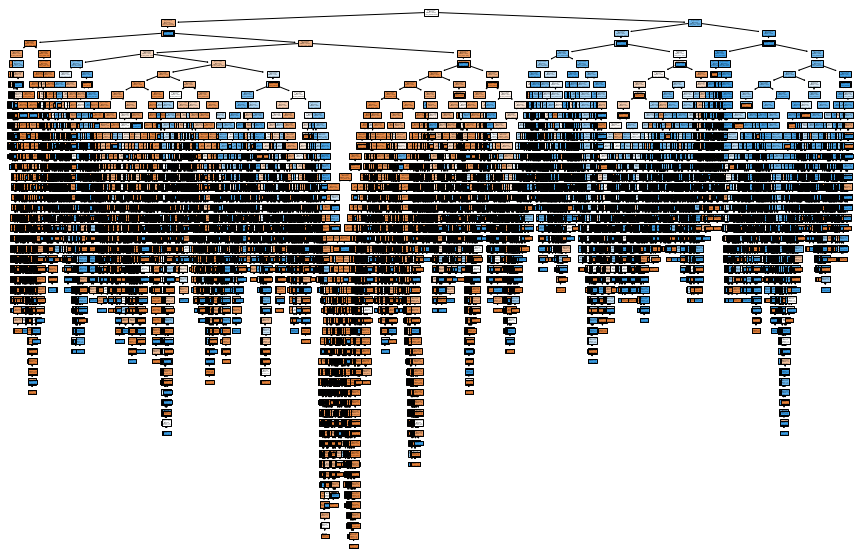

In [90]:
# Building Decision Tree Model
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(x_trainsc, y_os_train)

# Scoring our Decision Tree
print(dTree.score(x_trainsc, y_os_train))
print(dTree.score(x_testsc, y_test))

# Visualizing the Decision Tree
plt.figure(figsize=(15,10))
tree.plot_tree(dTree,filled=True)

In [91]:
# Reducing Overfitting
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 4, random_state=1)
dTreeR.fit(x_trainsc, y_os_train)
print(dTreeR.score(x_trainsc, y_os_train))
print(dTreeR.score(x_testsc, y_test))

0.7858995933249193
0.7610770062661026


0.7610770062661026


<IPython.core.display.Javascript object>

Accuracy Score for Decision Tree:  0.7610770062661026


Decision Tree Classifier Report


              precision    recall  f1-score   support

           0       0.31      0.77      0.45      7805
           1       0.96      0.76      0.85     55073

    accuracy                           0.76     62878
   macro avg       0.64      0.77      0.65     62878
weighted avg       0.88      0.76      0.80     62878



ROC score:  0.7661790635044725


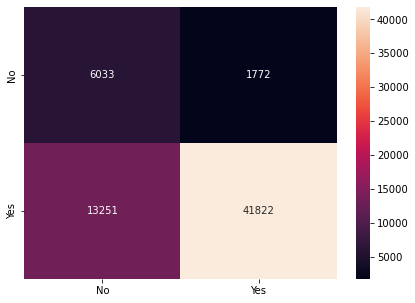

In [92]:
# Decision Tree Analysis Model
print(dTreeR.score(x_testsc , y_test))
y_predict = dTreeR.predict(x_testsc)

cm = confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

## Saving the Classification Reports for Meta Learning Models:

pred_report_tree = classification_report(y_test, y_predict , digits=2)

### Saving the ROC_AUC Scores for Meta Learning Algorithms

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_predict)
roc_tree = auc(false_positive_rate, true_positive_rate)

## Saving the accuracy

accuracy = accuracy_score(y_test, y_predict)

print("Accuracy Score for Decision Tree: ",accuracy)
print("\n")
print("Decision Tree Classifier Report")
print("\n")
print(pred_report_tree)
print("\n")
print("ROC score: ",roc_tree)

In [93]:
##### K Fold Cross Validation ####
    
cross_valid = True
cv_score = cross_val_score(dTree , x , y, scoring = 'accuracy', 
                                          cv = KFold(n_splits = 10))
accuracy = accuracy_score(y_test, y_predict)

print("The Cross Validation Score For Baseline Decision Tree Classifier Model After", "Fold Cross Validation Is :  \n", cv_score)
print(" ")
print("The Accuracy Score For Baseline Decision Tree Classifier Model After Cross Validation Is: \n", accuracy)

The Cross Validation Score For Baseline Decision Tree Classifier Model After Fold Cross Validation Is :  
 [0.88201336 0.87833969 0.88167939 0.88315282 0.88143518 0.88491817
 0.88291426 0.88238943 0.88219858 0.88601555]
 
The Accuracy Score For Baseline Decision Tree Classifier Model After Cross Validation Is: 
 0.7610770062661026


In [ ]:
### Hyper-parameter Tuning of Decision Tree by Grid Search CV 
criterion = ['gini','entropy','log_class']
max_depth = [1,3,5,7]
max_features = ['sqrt','log2',None]
random_state=[1,5,7,10]

param_grid = dict(criterion=criterion,
                  max_depth=max_depth,
                  max_features=max_features,
                  random_state=random_state)

grid = GridSearchCV(estimator = dTree,
                    param_grid = param_grid,
                    scoring ='accuracy',
                    verbose = 1,
                    n_jobs =-1, 
                    cv = 3)
grid_result = grid.fit(x_trainsc, y_os_train)

print('Best Score: ', grid_result.best_score_)

print('Best Params: ', grid_result.best_params_)

0.8368274669284346
0.7963675689430325
0.7963675689430325


<IPython.core.display.Javascript object>

Accuracy Score for Decision Tree:  0.7963675689430325


Decision Tree Classifier Report


              precision    recall  f1-score   support

           0       0.36      0.83      0.50      7805
           1       0.97      0.79      0.87     55073

    accuracy                           0.80     62878
   macro avg       0.67      0.81      0.69     62878
weighted avg       0.90      0.80      0.83     62878



ROC score:  0.8123318403098383


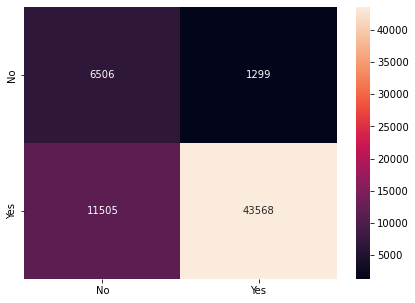

In [94]:
dTreeR2 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 7, max_features=None, random_state=10)
dTreeR2.fit(x_trainsc, y_os_train)
print(dTreeR2.score(x_trainsc, y_os_train))
print(dTreeR2.score(x_testsc, y_test))

# Decision Tree Analysis Model
print(dTreeR2.score(x_testsc , y_test))
y_predict = dTreeR2.predict(x_testsc)
cm = confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

## Saving the Classification Reports for Meta Learning Models:

pred_report_tree = classification_report(y_test, y_predict , digits=2)

### Saving the ROC_AUC Scores for Meta Learning Algorithms

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_predict)
roc_tree = auc(false_positive_rate, true_positive_rate)

## Saving the accuracy

accuracy = accuracy_score(y_test, y_predict)

print("Accuracy Score for Decision Tree: ",accuracy)
print("\n")
print("Decision Tree Classifier Report")
print("\n")
print(pred_report_tree)
print("\n")
print("ROC score: ",roc_tree)

### Random Forest Classification Model

In [95]:
rf_model = RandomForestClassifier()
rf_model.fit(x_trainsc, y_os_train)
y_predict= rf_model.predict(x_testsc)

## Saving the Classification Reports for Meta Learning Models:

pred_report_rf = classification_report(y_test, y_predict , digits=2)

### Saving the ROC_AUC Scores for Meta Learning Algorithms

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_predict)
roc_rf = auc(false_positive_rate, true_positive_rate)

## Saving the accuracy

accuracy = accuracy_score(y_test, y_predict)

print("Accuracy Score for Random Forest: ",accuracy)
print("\n")
print("ROC score: ",roc_rf)
print("\n")
print("Random Forest Classifier Report")
print("\n")
print(pred_report_rf)

Accuracy Score for Random Forest:  0.9133401189605267


ROC score:  0.7905847975140513


Random Forest Classifier Report


              precision    recall  f1-score   support

           0       0.66      0.63      0.64      7805
           1       0.95      0.95      0.95     55073

    accuracy                           0.91     62878
   macro avg       0.80      0.79      0.80     62878
weighted avg       0.91      0.91      0.91     62878



In [96]:
##### K Fold Cross Validation ####
    
cross_valid = True
cv_score = cross_val_score(rf_model , x , y, scoring = 'accuracy', cv = KFold(n_splits = 10))
accuracy = accuracy_score(y_test, y_predict)

print("The Cross Validation Score For Baseline Random Forest Classifier Model After", "Fold Cross Validation Is :  \n", cv_score)
print(" ")
print("The Accuracy Score For Baseline Random Forest Model After Cross Validation Is: \n", accuracy)

The Cross Validation Score For Baseline Random Forest Classifier Model After Fold Cross Validation Is :  
 [0.92175573 0.92061069 0.91889313 0.9217997  0.91888926 0.92213369
 0.92313565 0.92227683 0.9178873  0.92313565]
 
The Accuracy Score For Baseline Random Forest Model After Cross Validation Is: 
 0.9133401189605267


In [97]:
rf_model2 = RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',criterion='gini',max_features='sqrt', n_estimators=100, random_state=10)
rf_model2.fit(x_trainsc, y_os_train)
y_predict= rf_model2.predict(x_testsc)

## Saving the Classification Reports for Meta Learning Models:

pred_report_rf = classification_report(y_test, y_predict , digits=2)

### Saving the ROC_AUC Scores for Meta Learning Algorithms

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_predict)
roc_rf = auc(false_positive_rate, true_positive_rate)

## Saving the accuracy

accuracy = accuracy_score(y_test, y_predict)

print("Accuracy Score for Random Forest: ",accuracy)
print("\n")
print("ROC score: ",roc_rf)
print("\n")
print("Random Forest Classifier Report")
print("\n")
print(pred_report_rf)

Accuracy Score for Random Forest:  0.9133560227742613


ROC score:  0.7906488590130906


Random Forest Classifier Report


              precision    recall  f1-score   support

           0       0.66      0.63      0.64      7805
           1       0.95      0.95      0.95     55073

    accuracy                           0.91     62878
   macro avg       0.80      0.79      0.80     62878
weighted avg       0.91      0.91      0.91     62878



### Ada Boost Algorithm

In [98]:
clf = AdaBoostClassifier()
clf.fit(x_trainsc, y_os_train)
y_pred = clf.predict(x_testsc)

### Saving the ROC_AUC Score

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc_1 = auc(false_positive_rate, true_positive_rate)

########## Printing the Accuracy Score

print("Accuracy Score: ",accuracy_score(y_test, y_pred))
print("\n")
print("roc_auc_1 score: ", roc_auc_1)
########## Printing the Classification Report

print(classification_report(y_test, y_pred, digits=2))


Accuracy Score:  0.8337097235917172


roc_auc_1 score:  0.8081370561765477
              precision    recall  f1-score   support

           0       0.41      0.77      0.54      7805
           1       0.96      0.84      0.90     55073

    accuracy                           0.83     62878
   macro avg       0.69      0.81      0.72     62878
weighted avg       0.89      0.83      0.85     62878



In [99]:
##### K Fold Cross Validation ####
    
cross_valid = True
cv_score = cross_val_score(clf , x , y, scoring = 'accuracy', cv = KFold(n_splits = 10))
accuracy = accuracy_score(y_test, y_predict)

print("The Cross Validation Score For Baseline Ada Boosting Classifier Model After", "Fold Cross Validation Is :  \n", cv_score)
print(" ")
print("The Accuracy Score For Baseline Ada Boosting Classifier Model After Cross Validation Is: \n", accuracy)

The Cross Validation Score For Baseline Ada Boosting Classifier Model After Fold Cross Validation Is :  
 [0.90887405 0.90978053 0.90644084 0.90858342 0.90958538 0.90968081
 0.91306837 0.91058734 0.90438475 0.91106446]
 
The Accuracy Score For Baseline Ada Boosting Classifier Model After Cross Validation Is: 
 0.9133560227742613


In [100]:
clf2 = AdaBoostClassifier(n_estimators =100 ,learning_rate= 1,algorithm='SAMME.R' , random_state= 1)
clf2.fit(x_trainsc, y_os_train)
y_pred = clf2.predict(x_testsc)

### Saving the ROC_AUC Score

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc_1 = auc(false_positive_rate, true_positive_rate)

########## Printing the Accuracy Score

print("Accuracy Score: ",accuracy_score(y_test, y_pred))
print("\n")
print("roc_auc_1 score: ", roc_auc_1)
########## Printing the Classification Report

print(classification_report(y_test, y_pred, digits=2))




Accuracy Score:  0.8510925920035625


roc_auc_1 score:  0.8050293633330627
              precision    recall  f1-score   support

           0       0.44      0.74      0.55      7805
           1       0.96      0.87      0.91     55073

    accuracy                           0.85     62878
   macro avg       0.70      0.81      0.73     62878
weighted avg       0.90      0.85      0.87     62878



### Gradient Boosting Algorithm

In [101]:
clf3= GradientBoostingClassifier()
clf3.fit(x_trainsc, y_os_train)
y_pred = clf3.predict(x_testsc)

### Saving the ROC_AUC Score

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc_2 = auc(false_positive_rate, true_positive_rate)

########## Printing the Accuracy Score

print("Accuracy Score: ",accuracy_score(y_test, y_pred))
########## Printing the ROC_AOC Score

print("roc_auc_2 score: ", roc_auc_2)

########## Printing the Classification Report

print(classification_report(y_test, y_pred, digits=2))

<IPython.core.display.Javascript object>

Accuracy Score:  0.867234962944114
roc_auc_2 score:  0.8155090059082143
              precision    recall  f1-score   support

           0       0.48      0.75      0.58      7805
           1       0.96      0.88      0.92     55073

    accuracy                           0.87     62878
   macro avg       0.72      0.82      0.75     62878
weighted avg       0.90      0.87      0.88     62878



In [102]:
##### K Fold Cross Validation ####
    
cross_valid = True
cv_score = cross_val_score(clf3 , x , y, scoring = 'accuracy', cv = KFold(n_splits = 10))
accuracy = accuracy_score(y_test, y_predict)

print("The Cross Validation Score For Baseline Gradient Boosting Classifier Model After", "Fold Cross Validation Is :  \n", cv_score)
print(" ")
print("The Accuracy Score For Baseline Gradient Boosting Classifier Model After Cross Validation Is: \n", accuracy)

The Cross Validation Score For Baseline Gradient Boosting Classifier Model After Fold Cross Validation Is :  
 [0.91798664 0.91736641 0.91359733 0.918269   0.91774417 0.91755332
 0.91950952 0.91960494 0.91259125 0.91922325]
 
The Accuracy Score For Baseline Gradient Boosting Classifier Model After Cross Validation Is: 
 0.9133560227742613


In [103]:
clf4 = GradientBoostingClassifier(loss ='exponential' ,learning_rate=1 ,n_estimators=100 ,criterion='friedman_mse' , random_state=15 )
clf4.fit(x_trainsc, y_os_train)
y_pred = clf4.predict(x_testsc)

### Saving the ROC_AUC Score

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc_2 = auc(false_positive_rate, true_positive_rate)

########## Printing the Accuracy Score

print("Accuracy Score: ",accuracy_score(y_test, y_pred))
########## Printing the ROC_AOC Score

print("roc_auc_2 score: ", roc_auc_2)

########## Printing the Classification Report

print(classification_report(y_test, y_pred, digits=2))




<IPython.core.display.Javascript object>

Accuracy Score:  0.9080759566143961
roc_auc_2 score:  0.7925281328016174
              precision    recall  f1-score   support

           0       0.63      0.64      0.63      7805
           1       0.95      0.95      0.95     55073

    accuracy                           0.91     62878
   macro avg       0.79      0.79      0.79     62878
weighted avg       0.91      0.91      0.91     62878



### XG Boost Algorithm

In [105]:
XGB=XGBClassifier(verbosity=0)
XGB.fit(x_trainsc, y_os_train)
predxg=XGB.predict(x_testsc)

### Saving the ROC_AUC Score

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predxg)
roc_auc_2 = auc(false_positive_rate, true_positive_rate)

########## Printing the Accuracy Score

print("Accuracy Score: ",accuracy_score(y_test, predxg))
########## Printing the ROC_AOC Score

print("roc_auc_2 score: ", roc_auc_2)

########## Printing the Classification Report

print(classification_report(y_test, predxg, digits=2))


Accuracy Score:  0.9145806164318203
roc_auc_2 score:  0.7987705875631637
              precision    recall  f1-score   support

           0       0.66      0.64      0.65      7805
           1       0.95      0.95      0.95     55073

    accuracy                           0.91     62878
   macro avg       0.80      0.80      0.80     62878
weighted avg       0.91      0.91      0.91     62878



### Bagging Classifier

In [106]:
BCM=BaggingClassifier()
BCM.fit(x_trainsc, y_os_train)
predbcm=BCM.predict(x_testsc)

### Saving the ROC_AUC Score

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predbcm)
roc_auc_2 = auc(false_positive_rate, true_positive_rate)

########## Printing the Accuracy Score

print("Accuracy Score: ",accuracy_score(y_test, predbcm))
########## Printing the ROC_AOC Score

print("roc_auc_2 score: ", roc_auc_2)

########## Printing the Classification Report

print(classification_report(y_test, predbcm, digits=2))

Accuracy Score:  0.8973090747161169
roc_auc_2 score:  0.8002373705772594
              precision    recall  f1-score   support

           0       0.57      0.67      0.62      7805
           1       0.95      0.93      0.94     55073

    accuracy                           0.90     62878
   macro avg       0.76      0.80      0.78     62878
weighted avg       0.91      0.90      0.90     62878



In [107]:
##### K Fold Cross Validation ####
    
cross_valid = True
cv_score = cross_val_score(BCM , x , y, scoring = 'accuracy', cv = KFold(n_splits = 10))
accuracy = accuracy_score(y_test, y_predict)

print("The Cross Validation Score For Baseline Bagging Classifier Model After", "Fold Cross Validation Is :  \n", cv_score)
print(" ")
print("The Accuracy Score For Baseline BaggingClassifier Model After Cross Validation Is: \n", accuracy)

The Cross Validation Score For Baseline Gradient Boosting Classifier Model After Fold Cross Validation Is :  
 [0.91459924 0.91288168 0.91054389 0.91597882 0.91125531 0.91154158
 0.9131638  0.91521542 0.90920368 0.91526313]
 
The Accuracy Score For Baseline Gradient Boosting Classifier Model After Cross Validation Is: 
 0.9133560227742613


In [111]:
### Hyper-parameter Tuning of Gradient Boosting Classifier

parameter = {'bootstrap':['True','False'],
             'n_jobs': [-2,-1,1,2],
             'n_estimators':[10,20,30,40],
             'warm_start':['True','False']}

param_grid = parameter

grid = GridSearchCV(estimator = BCM,
                    param_grid = param_grid,
                    scoring ='roc_auc',
                    verbose = 1,
                    n_jobs =-1, 
                    cv = 3)
grid_result = grid.fit(x_trainsc, y_os_train)

print('Best Score: ', grid_result.best_score_)

print('Best Params: ', grid_result.best_params_)

Fitting 3 folds for each of 64 candidates, totalling 192 fits
Best Score:  0.9833599695837675
Best Params:  {'bootstrap': 'True', 'n_estimators': 40, 'n_jobs': -2, 'warm_start': 'True'}


In [113]:
BCM2=BaggingClassifier(bootstrap= True, n_estimators= 40, n_jobs=-2, warm_start=True)
BCM2.fit(x_trainsc, y_os_train)
predbcm=BCM2.predict(x_testsc)

### Saving the ROC_AUC Score

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predbcm)
roc_auc_2 = auc(false_positive_rate, true_positive_rate)

########## Printing the Accuracy Score

print("Accuracy Score: ",accuracy_score(y_test, predbcm))
########## Printing the ROC_AOC Score

print("roc_auc_2 score: ", roc_auc_2)

########## Printing the Classification Report

print(classification_report(y_test, predbcm, digits=2))

Accuracy Score:  0.9071853430452622
roc_auc_2 score:  0.7954286403836976
              precision    recall  f1-score   support

           0       0.62      0.65      0.63      7805
           1       0.95      0.94      0.95     55073

    accuracy                           0.91     62878
   macro avg       0.79      0.80      0.79     62878
weighted avg       0.91      0.91      0.91     62878



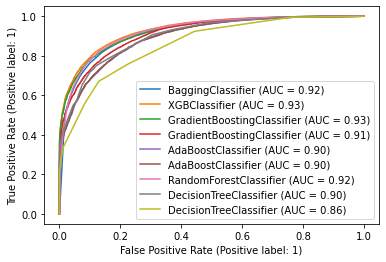

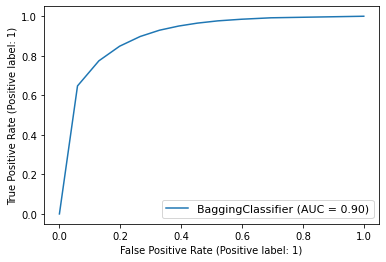

In [115]:
# ROC-AUC Curve Comparison

disp = plot_roc_curve(BCM2,x_testsc,y_test)
plot_roc_curve(BCM,x_testsc,y_test)
plot_roc_curve(XGB, x_testsc, y_test, ax=disp.ax_)
plot_roc_curve(clf4, x_testsc, y_test, ax=disp.ax_)
plot_roc_curve(clf3, x_testsc, y_test, ax=disp.ax_)
plot_roc_curve(clf2, x_testsc, y_test, ax=disp.ax_)
plot_roc_curve(clf, x_testsc, y_test, ax=disp.ax_)
plot_roc_curve(rf_model, x_testsc, y_test, ax=disp.ax_)
plot_roc_curve(dTreeR2, x_testsc, y_test, ax=disp.ax_)
plot_roc_curve(dTreeR, x_testsc, y_test, ax=disp.ax_)

plt.legend(prop={'size':11}, loc='lower right')
plt.show()

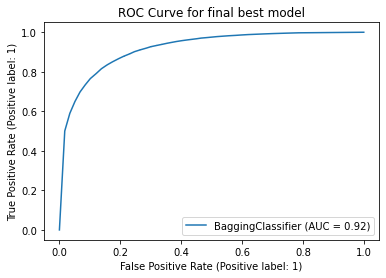

In [117]:
#Ploting ROC curve for final best model
plot_roc_curve(BCM2, x_testsc, y_test)
plt.title('ROC Curve for final best model')
plt.show()

## Saving the model

In [118]:
saved_model = pickle.dumps(BCM2)

In [119]:
Predict = BCM2.predict(x_test)
Predict

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [120]:
pd.DataFrame([BCM2.predict(x_test)[:],y_test[:]],index=["Predicted","Actual"])

<IPython.core.display.Javascript object>

0      1      2      3      4      5      6      7      8      \
Predicted      1      1      1      1      1      1      1      1      1   
Actual         0      1      1      1      1      0      1      1      1   

           9      ...  62868  62869  62870  62871  62872  62873  62874  62875  \
Predicted      1  ...      1      1      1      1      1      1      1      1   
Actual         1  ...      1      1      0      1      1      1      1      1   

           62876  62877  
Predicted      1      1  
Actual         1      1  

[2 rows x 62878 columns]

Above are the predicted values and the actual values.They are almost similar.

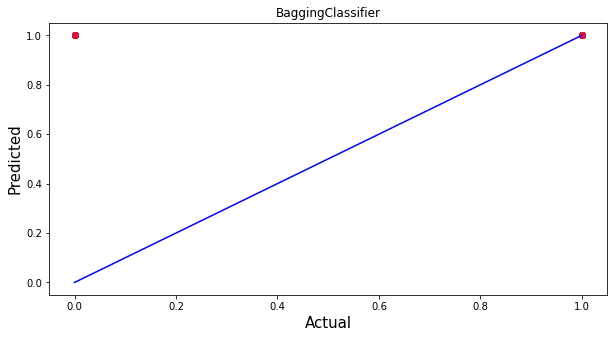

In [122]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, Predict, c='crimson')
p1 = max(max(Predict), max(y_test))
p2 = min(min(Predict), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title("BaggingClassifier")
plt.show()

# Predictions:

In [ ]:
# Loading the saved model
model=joblib.load("MicroCreditLoan.pkl")

#Prediction
prediction = model.predict(X_test)
prediction

In [ ]:
pd.DataFrame([model.predict(X_test)[:],y_test[:]],index=["Predicted","Actual"])

Above are the predicted values and the actual values.They are almost similar.

Plotting Actual vs Predicted,To get better insight.Bule line is the actual line and red dots are the predicted values.